In [1]:
import pandas as pd

import requests
from io import StringIO
def get_github_csv_data(github_url):
    response = requests.get(github_url)
    
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        # Hatalı satırları atlayarak CSV'yi oku
        df = pd.read_csv(csv_data)
        return df
    else:
        raise Exception(f"Veri çekme hatası. HTTP Durum Kodu: {response.status_code}")

gfe=get_github_csv_data("https://raw.githubusercontent.com/kaboya19/streamlit-gfe/main/gfe.csv")


gfe=gfe.set_index("Tarih")
gfe.index=pd.to_datetime(gfe.index)


In [9]:
seasonal_adjuested=pd.read_csv("sa.csv",index_col=0)["Gıda"]
seasonal_adjuested.index=pd.to_datetime(seasonal_adjuested.index)
from datetime import datetime,timedelta
import pytz
turkey_tz = pytz.timezone('Europe/Istanbul')
monthh = datetime.now(tz=turkey_tz).month
onceki=datetime.now(tz=turkey_tz)-timedelta(days=30)
onceki=onceki.month
year=datetime.now().year

In [10]:
seasonal_adjuested1=pd.DataFrame(seasonal_adjuested.copy())
seasonal_adjuested1["Tarih"]=pd.to_datetime(seasonal_adjuested1.index)
ay_datasa = seasonal_adjuested1[seasonal_adjuested1['Tarih'].dt.month == monthh]
oncekiay_datasa = seasonal_adjuested1[seasonal_adjuested1['Tarih'].dt.month == onceki]

aybasısonusa=((ay_datasa.iloc[-1,0]/oncekiay_datasa.iloc[-1,0])-1)*100


In [94]:
gfe = pd.read_csv("gfe.csv")
gfe = gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe = gfe.drop("Tarih", axis=1)

endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)


endeksler.loc["Gıda"]=gfe["GFE"].values



gida_index = endeksler.loc[['Gıda']]  # "Gıda Fiyat Endeksi"ni seç
other_indices = endeksler.drop('Gıda').sort_index()  # Geri kalanları alfabetik sıraya koy
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar=ağırlıklar["Ağırlık"]

endeksler = pd.concat([gida_index, other_indices])
endeksler1=endeksler.T
endeksler1=endeksler1.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler1))))
endeksler1=endeksler1.drop("Gıda",axis=1)
endeksler_sa=pd.DataFrame()


    



gruplar = endeksler.index


selected_group = "Gıda"







    
selected_group_data = endeksler.loc[selected_group]

selected_group_data=pd.DataFrame(selected_group_data)

    # Datetime index'i atıyoruz
selected_group_data.index = gfe.index
selected_group_data["Endeks_2024-10-11"]=100

In [95]:
def hareketli_aylik_ortalama1(df):
            değer=df.name
            df=pd.DataFrame(df)
            df["Tarih"]=pd.to_datetime(df.index)
            df['Aylık Ortalama'] = df.groupby(df['Tarih'].dt.to_period('M'))[değer].expanding().mean().reset_index(level=0, drop=True)
            df.index=pd.to_datetime(df.index)
            return df


def hareketli_aylik_ortalama(df):
        değer = df.name  # Kolon ismi
        df = pd.DataFrame(df)
        df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
        df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
        
        # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
        df["Aylık Ortalama"] = (
            df[df["Gün Sırası"] <= 24]
            .groupby(df["Tarih"].dt.to_period("M"))[değer]
            .expanding()
            .mean()
            .reset_index(level=0, drop=True)
        )
        
        # Orijinal indeksi geri yükle
        df.index = pd.to_datetime(df.index)
        return df

# Hareketli aylık ortalama hesaplama
hareketlima = hareketli_aylik_ortalama(selected_group_data.iloc[:,0])
hareketlima["Aylık Ortalama"]=hareketlima["Aylık Ortalama"].fillna(method="ffill")

C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\4292035229.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hareketlima["Aylık Ortalama"]=hareketlima["Aylık Ortalama"].fillna(method="ffill")


In [98]:
hareketlima1 = hareketli_aylik_ortalama1(selected_group_data.iloc[:,0])


In [104]:
import pytz
turkey_tz = pytz.timezone('Europe/Istanbul')
month = datetime.now(tz=turkey_tz).month

In [106]:
hareketlima1

,Gıda,Tarih,Aylık Ortalama
Tarih,,,
2024-10-11,100.000000,2024-10-11,100.000000
2024-10-12,100.157618,2024-10-12,100.078809
2024-10-13,100.060674,2024-10-13,100.072764
2024-10-14,100.547419,2024-10-14,100.191428
2024-10-15,100.713128,2024-10-15,100.295768
2024-10-16,100.838086,2024-10-16,100.386154
2024-10-17,100.888297,2024-10-17,100.457889
2024-10-18,100.175737,2024-10-18,100.422620
2024-10-19,100.108725,2024-10-19,100.387743


In [121]:
aylıkenf=np.round(float(((hareketlima["Aylık Ortalama"].resample("M").last().loc["2024-12-31":].iloc[0]/hareketlima["Aylık Ortalama"].resample("M").last().loc[f"{year}-{onceki}"].iloc[0])-1)*100),2)
aylıklar=pd.DataFrame()
aylıklar["Tarih"]=[pd.to_datetime("2024-11-30"),hareketlima["Aylık Ortalama"].resample("M").last().loc[f"{year}-{month}"].index[0]]
aylıklar["Aylık Değişim"]=[3.2,aylıkenf]

C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\1251131251.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylıkenf=np.round(float(((hareketlima["Aylık Ortalama"].resample("M").last().loc["2024-12-31":].iloc[0]/hareketlima["Aylık Ortalama"].resample("M").last().loc[f"{year}-{onceki}"].iloc[0])-1)*100),2)
C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\1251131251.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylıklar["Tarih"]=[pd.to_datetime("2024-11-30"),hareketlima["Aylık Ortalama"].resample("M").last().loc[f"{year}-{month}"].index[0]]


In [122]:
aylıklar

,Tarih,Aylık Değişim
0,2024-11-30,3.20
1,2024-12-31,2.39


In [101]:
from datetime import datetime
month=datetime.now().month
onceki=month-1
year=datetime.now().year
((((hareketlima1["Aylık Ortalama"].loc[f"{year}-{onceki}-01":])/selected_group_data.resample('M').mean().iloc[-2,0]))-1)*100

C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\1780982205.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ((((hareketlima1["Aylık Ortalama"].loc[f"{year}-{onceki}-01":])/selected_group_data.resample('M').mean().iloc[-2,0]))-1)*100


Tarih
2024-11-01   -2.280702
2024-11-02   -2.214179
2024-11-03   -2.187601
2024-11-04   -2.160044
2024-11-05   -2.044821
2024-11-06   -1.958949
2024-11-07   -1.880544
2024-11-08   -1.662525
2024-11-09   -1.503160
2024-11-10   -1.357039
2024-11-11   -1.232123
2024-11-12   -1.118154
2024-11-13   -0.983585
2024-11-14   -0.862370
2024-11-15   -0.771771
2024-11-16   -0.690859
2024-11-17   -0.617682
2024-11-18   -0.542024
2024-11-19   -0.467660
2024-11-20   -0.402008
2024-11-21   -0.344601
2024-11-22   -0.303347
2024-11-23   -0.271246
2024-11-24   -0.243729
2024-11-25   -0.208198
2024-11-26   -0.191176
2024-11-27   -0.169327
2024-11-28   -0.144231
2024-11-29   -0.073411
2024-11-30    0.000000
2024-12-01    2.140217
Name: Aylık Ortalama, dtype: float64

In [47]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(endeksler)))
ağırlıklar=pd.read_excel("Weights_2022.xlsx")
cols=ağırlıklar["Unnamed: 1"].dropna().iloc[2:130].values
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")
ağırlıklar.columns=["Grup","Ağırlık"]
endeksler=endeksler[cols]
gruplar=pd.concat([ağırlıklar.reset_index().drop("index",axis=1),endeksler.T.reset_index().iloc[:,1:]],axis=1)
weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()

# Rename columns for clarity
weighted_sums.columns = ['Grup'] + [f'{col}_Toplam' for col in gruplar.columns[2:]]
# Calculate total weight for each group
total_weights = gruplar.groupby('Grup')['Ağırlık'].sum().reset_index()
total_weights.columns = ['Grup', 'Toplam_Ağırlık']

# Merge total weights with weighted sums
weighted_sums = pd.merge(weighted_sums, total_weights, on='Grup')

# Calculate indices for each date by dividing weighted sum by total weight
for col in weighted_sums.columns[1:-1]:  # Exclude 'Grup' and 'Toplam_Ağırlık'
    weighted_sums[col] = weighted_sums[col] / weighted_sums['Toplam_Ağırlık']

# Drop 'Toplam_Ağırlık' for display purposes
weighted_indices = weighted_sums.drop(columns=['Toplam_Ağırlık'])

weighted_indices=weighted_indices.T
cols=weighted_indices.iloc[0,:]
weighted_indices.columns=cols
weighted_indices=weighted_indices.iloc[1:,:]
weighted_indices=weighted_indices.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(weighted_indices)))


ağırlıklar=pd.read_excel("Weights_2022.xlsx")
cols=ağırlıklar["Unnamed: 1"].dropna().iloc[2:130].values
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")
ağırlıklar.columns=["Grup","Ağırlık"]
endeksler=endeksler[cols]
gruplar=pd.concat([ağırlıklar.reset_index().drop("index",axis=1),endeksler.T.reset_index().iloc[:,1:]],axis=1)
weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()

# Rename columns for clarity
weighted_sums.columns = ['Grup'] + [f'{col}_Toplam' for col in gruplar.columns[2:]]
# Calculate total weight for each group
total_weights = gruplar.groupby('Grup')['Ağırlık'].sum().reset_index()
total_weights.columns = ['Grup', 'Toplam_Ağırlık']

# Merge total weights with weighted sums
weighted_sums = pd.merge(weighted_sums, total_weights, on='Grup')

# Calculate indices for each date by dividing weighted sum by total weight
for col in weighted_sums.columns[1:-1]:  # Exclude 'Grup' and 'Toplam_Ağırlık'
    weighted_sums[col] = weighted_sums[col] / weighted_sums['Toplam_Ağırlık']

# Drop 'Toplam_Ağırlık' for display purposes
weighted_indices = weighted_sums.drop(columns=['Toplam_Ağırlık'])

weighted_indices=weighted_indices.T
cols=weighted_indices.iloc[0,:]
weighted_indices.columns=cols
weighted_indices=weighted_indices.iloc[1:,:]
weighted_indices=weighted_indices.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(weighted_indices)))
indice_sa=pd.DataFrame()
for col in weighted_indices.columns:
    weighted_indices[col]=weighted_indices[col].astype(float)
    model=UnobservedComponents(weighted_indices[col],level="local level",seasonal=7,stochastic_seasonal=True)
    results=model.fit()
    seasonal=results.smoothed_state[1]
    seasonal_adjuested=np.round(weighted_indices[col]-seasonal,2)
    indice_sa[col]=seasonal_adjuested
indice_sa.to_csv("indice_sa.csv")


C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\1256900665.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ağırlıklar=ağırlıklar.fillna(method="ffill")
C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\1256900665.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()
C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\1256900665.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ağ

In [4]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
import numpy as np
import pandas as pd
gfe = pd.read_csv("gfe.csv")
gfe = gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe = gfe.drop("Tarih", axis=1)

endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)


endeksler.loc["Gıda"]=gfe["GFE"].values



gida_index = endeksler.loc[['Gıda']]  # "Gıda Fiyat Endeksi"ni seç
other_indices = endeksler.drop('Gıda').sort_index()  # Geri kalanları alfabetik sıraya koy
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar=ağırlıklar["Ağırlık"]

endeksler = pd.concat([gida_index, other_indices])
endeksler1=endeksler.T
endeksler1=endeksler1.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler1))))
endeksler1=endeksler1.drop("Gıda",axis=1)
endeksler_sa=pd.DataFrame()
from statsmodels.tsa.statespace.structural import UnobservedComponents

for col in endeksler1.columns:
    model=UnobservedComponents(endeksler1[col],level="local level",seasonal=7,stochastic_seasonal=True)
    results=model.fit()
    seasonal=results.smoothed_state[1]
    sa=endeksler1[col]-seasonal
    endeksler_sa[col]=sa

for col in endeksler1.columns:
    endeksler_sa[col]=endeksler_sa[col]*ağırlıklar.loc[col]
gfe_sa=endeksler_sa.sum(axis=1)

        

    
sa=pd.DataFrame()
gruplar = endeksler.index
for selected_group in gruplar:
    selected_group_data = endeksler.loc[selected_group]

    selected_group_data=pd.DataFrame(selected_group_data)

        # Datetime index'i atıyoruz
    selected_group_data.index = gfe.index
    selected_group_data["Endeks_2024-10-11"]=100
    model=UnobservedComponents(selected_group_data.iloc[:,0],level="local level",seasonal=7,stochastic_seasonal=True)
    results=model.fit()
    seasonal=results.smoothed_state[1]
    seasonal_adjuested=np.round(selected_group_data[selected_group]-seasonal,2)
    sa[selected_group]=seasonal_adjuested

c:\Users\Makdos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Makdos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Makdos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\2121339799.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [8]:
gfe_sa.to_csv("gfesa.csv")

In [22]:
seasonal_adjuested=pd.read_csv("sa.csv",index_col=0)["Domates"]
seasonal_adjuested.index=pd.to_datetime(seasonal_adjuested.index)

In [31]:
gfe_sa_aylık=gfe_sa.resample('M').mean()  
gfe_sa_ekim=((gfe_sa.resample('M').last()/100)-1)*100
change_percent_sa_gfe=gfe_sa_ekim.copy().iloc[-1]
gfe_sa_ekim1=np.round(gfe_sa_ekim.loc["2024-10-31"],2)
gfe_sa_last=np.round(((gfe_sa_aylık.iloc[-1]/gfe_sa_aylık.iloc[-2])-1)*100,2)  
degisim30=np.round((gfe.pct_change(30).iloc[-1,0]*100),2)

C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\4242858314.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gfe_sa_aylık=gfe_sa.resample('M').mean()
C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\4242858314.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gfe_sa_ekim=((gfe_sa.resample('M').last()/100)-1)*100


In [37]:
float(np.round(gfe_sa_ekim.iloc[-1],2).astype(float))

5.86

In [7]:
def hareketli_aylik_ortalama(df):
        değer = df.name  # Kolon ismi
        df = pd.DataFrame(df)
        df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
        df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
        
        # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
        df["Aylık Ortalama"] = (
            df[df["Gün Sırası"] <= 24]
            .groupby(df["Tarih"].dt.to_period("M"))[değer]
            .expanding()
            .mean()
            .reset_index(level=0, drop=True)
        )
        
        # Orijinal indeksi geri yükle
        df.index = pd.to_datetime(df.index)
        return df

hareketlima = hareketli_aylik_ortalama(gfe["GFE"])
hareketlima["Aylık Ortalama"]=hareketlima["Aylık Ortalama"].fillna(method="ffill")

C:\Users\Makdos\AppData\Local\Temp\ipykernel_4808\2191590847.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hareketlima["Aylık Ortalama"]=hareketlima["Aylık Ortalama"].fillna(method="ffill")


In [19]:
fiyatlar=pd.read_csv("sepet.csv")
try:
    fiyatlar=fiyatlar.set_index(fiyatlar["Unnamed: 0"])
except:
        fiyatlar=fiyatlar.set_index(fiyatlar["original_index"])
fiyatlar.index.name="Madde"
fiyatlar=fiyatlar.sort_index()
fiyatlar=fiyatlar.rename(columns={"original_index":"Madde"})
fiyatlar

,Madde,Ürün,2024-10-11,2024-10-12,2024-10-13,2024-10-14,2024-10-15,2024-10-16,2024-10-17,2024-10-18,...,2024-11-19,2024-11-20,2024-11-21,2024-11-22,2024-11-23,2024-11-24,2024-11-25,2024-11-26,2024-11-27,2024-11-28
Madde,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,Antep Fıstığı,Siirt Fıstığı Tuzlu Kavrulmuş Kg,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,...,699.95,699.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95
Antep Fıstığı,Antep Fıstığı,Master Nut Kabuklu Antep Fıstığı 140 G,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,...,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95
Antep Fıstığı,Antep Fıstığı,By İzzet Antep Fıstığı 200 G,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.90,...,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.90
Antep Fıstığı,Antep Fıstığı,Migros Antep Fıstığı Jumbo 200 G,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,...,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00
Antep Fıstığı,Antep Fıstığı,Tadım Antep Fıstığı 180 G,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,...,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şehriye,Şehriye,Carrefour Tel Şehriye 500 g,10.75,10.75,10.75,10.75,10.75,10.75,10.75,11.75,...,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75
Şehriye,Şehriye,Nuhun Ankara Tel Şehriye 500 Gr,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,...,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75
Şehriye,Şehriye,Nuh'un Ankara Tel Şehriye 500 G,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,...,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75


In [6]:
csv_file = "gfe_ohlc.csv"
from datetime import datetime
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[today_date] = ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").drop("Unnamed: 0",axis=1).set_index("date")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]

In [2]:
from datetime import datetime
csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)
df.index=pd.to_datetime(df.index)
# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")

In [37]:
df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")       
)
ohlc=pd.read_csv("ohlc.csv").drop("Unnamed: 0",axis=1).set_index("date")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc

,high,low,open,close
2024-10-11,100.000000,100.000000,100.000000,100.000000
2024-10-12,100.303777,100.142735,100.303777,100.142735
2024-10-13,100.190370,100.044285,100.169373,100.044285
2024-10-14,100.737845,100.238600,100.238600,100.532800
2024-10-15,100.941533,100.472148,100.472148,100.703004
2024-10-16,101.225035,100.852848,100.949427,100.852848
2024-10-17,101.368670,100.900841,101.020989,100.900841
2024-10-18,101.224652,100.199170,101.224652,100.199170
2024-10-19,100.543003,100.136094,100.510589,100.136094
2024-10-20,100.450651,100.139060,100.450651,100.139060


In [3]:
gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index("Tarih")


In [5]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)


endeksler.loc["Gıda"]=gfe["GFE"].values

gida_index = endeksler.loc[['Gıda']]  # "Gıda Fiyat Endeksi"ni seç
other_indices = endeksler.drop('Gıda').sort_index()  # Geri kalanları alfabetik sıraya koy
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar=ağırlıklar["Ağırlık"]

In [8]:
selected_group_data = endeksler.loc["Armut"]

selected_group_data=pd.DataFrame(selected_group_data)
selected_group_data.index = gfe.index
selected_group_data["Endeks_2024-10-11"]=100

In [28]:
def hareketli_aylik_ortalama(df):
        değer=df.name
        df=pd.DataFrame(df)
        df["Tarih"]=pd.to_datetime(df.index)
        df['Aylık Ortalama'] = df.groupby(df['Tarih'].dt.to_period('M'))[değer].expanding().mean().reset_index(level=0, drop=True)
        df.index=pd.to_datetime(df.index)
        return df

# Hareketli aylık ortalama hesaplama
hareketlima = hareketli_aylik_ortalama(selected_group_data.iloc[:,0])

In [32]:
selected_group_data.loc["2024-10-15"].iloc[0]

np.float64(98.77899454935172)

In [40]:
data=pd.read_csv("C:/Users/Makdos/Documents/GitHub/streamlit-gfe/sepet.csv")
try:
    data=data.set_index(data["Unnamed: 0"]).drop("Unnamed: 0",axis=1)
except:
    data=data.set_index(data["original_index"]).drop("original_index",axis=1)
data.index.name=""
data

,Ürün,2024-10-11,2024-10-12,2024-10-13,2024-10-14,2024-10-15,2024-10-16,2024-10-17,2024-10-18,2024-10-19,...,2024-11-20,2024-11-21,2024-11-22,2024-11-23,2024-11-24,2024-11-25,2024-11-26,2024-11-27,2024-11-28,2024-11-29
,,,,,,,,,,,,,,,,,,,,,
Beyaz Peynir,Tahsildaroğlu Dilimli Ezine peynir 450 Gr ( %4...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,...,279.90,229.90,229.90,229.90,229.90,229.90,229.90,229.90,229.90,279.90
Beyaz Peynir,Tahsildaroğlu Ezine Peyniri 500 Gr ( %45 Keç...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,...,279.90,229.90,229.90,229.90,229.90,229.90,229.90,229.90,229.90,279.90
Meyve Suyu,Dimes % 100 Kırmızı Meyveler 1 lt,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,...,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
Süt,Baltalı % 100 Pastörize Keçi Sütü 1L,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,...,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50
Tulum Peyniri,Savak Erzincan Tulum Peyniri Kg % 100 Koyun Sütü,490.90,490.90,490.90,490.90,490.90,490.90,490.90,490.90,490.90,...,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Konserve Balık,Shaku Sushi Sakura,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,...,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99
Baharat,Susam,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,...,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90
Baharat,Tarçın,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,...,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90


In [41]:
ağırlıklar=pd.read_csv("C:/Users/Makdos/Documents/GitHub/streamlit-gfe/ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar

,Ağırlık,Değişim,Endeks_2024-10-11,Endeks_2024-10-12,Ağırlıklı Endeks_2024-10-12,Endeks_2024-10-13,Ağırlıklı Endeks_2024-10-13,Endeks_2024-10-14,Ağırlıklı Endeks_2024-10-14,Endeks_2024-10-15,...,Endeks_2024-11-25,Ağırlıklı Endeks_2024-11-25,Endeks_2024-11-26,Ağırlıklı Endeks_2024-11-26,Endeks_2024-11-27,Ağırlıklı Endeks_2024-11-27,Endeks_2024-11-28,Ağırlıklı Endeks_2024-11-28,Endeks_2024-11-29,Ağırlıklı Endeks_2024-11-29
Ürün,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,0.002075,1.103840,100.0,100.0,0.207497,100.000000,0.207497,100.000000,0.207497,100.000000,...,101.103840,0.209787,101.103840,0.209787,101.103840,0.209787,101.103840,0.209787,101.103840,0.209787
Armut,0.002032,1.605737,100.0,100.0,0.203163,100.000000,0.203163,100.000000,0.203163,100.000000,...,93.327773,0.189608,93.327773,0.189608,100.000000,0.203163,96.922454,0.196911,101.605737,0.206425
Ay Çekirdeği,0.007621,0.173375,100.0,100.0,0.762139,100.000000,0.762139,100.000000,0.762139,100.000000,...,100.173375,0.763461,100.173375,0.763461,100.173375,0.763461,100.173375,0.763461,100.173375,0.763461
Ayran,0.001595,2.234244,100.0,100.0,0.159504,100.042099,0.159571,100.042099,0.159571,99.904933,...,99.786505,0.159163,99.786505,0.159163,99.786505,0.159163,99.786505,0.159163,102.234244,0.163067
Ayva,0.000754,-7.736721,100.0,100.0,0.075374,100.000000,0.075374,100.000000,0.075374,100.000000,...,92.263279,0.069542,92.263279,0.069542,92.263279,0.069542,92.263279,0.069542,92.263279,0.069542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,0.007550,14.996459,100.0,100.0,0.754980,100.000000,0.754980,100.581395,0.759369,100.581395,...,107.472329,0.811394,107.472329,0.811394,107.472329,0.811394,107.659876,0.812810,114.996459,0.868200
Çilek,0.002812,0.000000,100.0,100.0,0.281246,100.000000,0.281246,100.000000,0.281246,100.000000,...,100.000000,0.281246,100.000000,0.281246,100.000000,0.281246,100.000000,0.281246,100.000000,0.281246
Üzüm,0.005283,0.853398,100.0,100.0,0.528349,100.000000,0.528349,100.000000,0.528349,100.453758,...,100.766796,0.532400,100.766796,0.532400,100.767009,0.532401,100.853398,0.532858,100.853398,0.532858


In [14]:
degisim=(((data.iloc[:,-1]/data.iloc[:,1])-1)*100).fillna(0).groupby(level=0).mean().sort_index()

In [19]:
(degisim*ağırlıklar["Ağırlık"]).sum()

np.float64(4.210083852020476)

In [84]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)

In [85]:
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(endeksler)))
endeksler

Ürün,Pirinç,Buğday Unu,Bebek Sütü (Toz Karışım),Bulgur,Ekmek,Bisküvi,Kraker,Gofret,Pasta,Kek,...,Bitki ve Meyve Çayı (Poşet),Kakao,Kakaolu Toz İçecekler,Su,Maden Suyu ve Sodası,Gazoz Meyveli,Kola,Soğuk Çay,Ayran,Meyve Suyu
2024-10-11,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2024-10-12,100.000000,100.000000,100.000000,100.335517,100.000000,100.501030,100.000000,99.939320,100.000000,100.000000,...,100.285326,100.000000,100.000000,99.573665,100.000000,100.000000,99.936143,100.000000,100.000000,99.899880
2024-10-13,100.000000,100.000000,100.000000,100.335517,100.000000,100.564454,100.000000,99.939320,100.000000,100.000000,...,100.285326,100.000000,100.000000,99.573665,100.000000,100.000000,99.936143,100.000000,100.023576,99.899880
2024-10-14,104.134813,100.000000,100.000000,104.122568,101.265957,103.249877,103.126086,102.994817,100.320513,102.275829,...,100.854235,100.000000,99.386892,100.031600,100.000000,100.224921,99.936143,100.000000,100.023576,100.027144
2024-10-15,103.813727,100.000000,100.648213,104.122568,101.265957,103.196125,102.885902,102.993201,100.320513,102.253856,...,100.854235,100.000000,99.386892,100.281600,100.000000,100.224921,99.936143,100.000000,99.946762,100.027144
2024-10-16,103.813727,100.000000,100.648213,104.514207,101.265957,104.198307,103.486398,103.492107,100.320513,104.300937,...,101.138690,100.000000,99.386892,100.674456,100.000000,100.336764,101.564164,100.332226,99.946762,100.036075
2024-10-17,103.813727,100.000000,98.948425,104.514207,101.265957,104.198307,103.486398,103.591749,100.320513,104.300937,...,101.138690,100.000000,99.386892,100.799769,100.000000,100.336764,101.564164,100.332226,99.878299,99.881589
2024-10-18,103.813727,100.505967,98.948425,104.514207,101.265957,104.073728,102.494334,102.984807,100.320513,96.909411,...,101.138690,100.000000,99.386892,100.799769,100.000000,100.224921,101.112936,100.465340,99.878299,99.683351
2024-10-19,103.357897,100.505967,98.948425,104.872435,101.265957,104.073728,102.600154,103.140147,100.320513,96.909411,...,101.138690,100.000000,99.386892,100.799769,100.000000,100.224921,101.112936,100.685595,99.878299,99.683351
2024-10-20,103.357897,100.505967,98.948425,104.435169,101.265957,104.073728,102.600154,103.194084,100.320513,96.909411,...,101.138690,100.000000,99.386892,101.048269,100.000000,100.224921,101.112936,100.685595,99.901874,99.683351


In [86]:
endeksler=((endeksler.loc["2024-11-08"]/100)-1)*100

In [87]:
ağırlıklar=pd.read_excel("Weights_2022.xlsx")
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100

In [88]:
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")

C:\Users\Bora\AppData\Local\Temp\ipykernel_132056\687292031.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ağırlıklar=ağırlıklar.fillna(method="ffill")


In [89]:
ağırlıklar["Artış"]=endeksler.values

In [90]:
ağırlıklar.columns=["Grup","Ağırlık","Artış"]
ağırlıklar

,Grup,Ağırlık,Artış
4,Pirinç,1.012932,1.710804
5,Un ve diğer tahıllar,2.035180,1.562036
6,Un ve diğer tahıllar,0.500646,1.699224
7,Un ve diğer tahıllar,0.595179,2.070302
8,Ekmek,10.027262,4.225616
...,...,...,...
127,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.204993,2.400810
128,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.746265,2.122586
129,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.094077,1.622016
130,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.159504,-0.209727


In [91]:
ağırlıklar['Ağırlıklı Artış'] = ağırlıklar['Ağırlık'] * ağırlıklar['Artış']

# Group by 'Grup' and calculate total weight and weighted average artış
grouped = ağırlıklar.groupby('Grup').agg(
    total_weight=('Ağırlık', 'sum'),
    weighted_increase=('Ağırlıklı Artış', 'sum')
)

In [92]:
grouped['Ağırlıklı_Artış'] = grouped['weighted_increase'] / grouped['total_weight']

In [93]:
harcama=pd.read_excel("C:/Users/Bora/Documents/GitHub/Enflasyon-SATRIM/harcamagrupları_aylık.xlsx")
harcama=harcama.set_index("Unnamed: 0")
harcama

,Pirinç,Un ve diğer tahıllar,Ekmek,"Diğer fırıncılık ürünleri (bisküvi, kek, kraker, yufka, baklava vb.)",Makarna çeşitleri,Kahvaltılık tahıl ürünleri,Dana eti,Kuzu eti,Tavuk eti,Diğer etler ve yenilebilir sakatatlar,...,"Kişisel hijyen ve bakım için kullanılan ürünler, kozmetikler","Mücevheratlar, saat ve kol saatleri",Seyahat malzemeleri ve diğer kişisel aksesuarlar,Başka yerde sınıflandırılmamış diğer kişisel aksesuarlar,Çocuk bakım hizmetleri (kreşler),Konut sigortası,Sağlık sigortası,Ulaştırma sigortası,Başka yerde sınıflandırılmayan diğer mali hizmetler (para havale ücreti vb.),"Başka yerde sınıflandırılmayan diğer hizmetler (noterlik, avukatlık hizmetleri vb.)"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2019-02-28,3.961780,0.214919,1.141512,1.201612,0.090657,1.688687,-0.225963,1.717411,1.122899,0.789068,...,-1.415153,-0.085449,-1.457363,-1.266122,0.939979,0.700568,1.133086,0.912931,2.250858,0.032031
2019-03-31,0.442726,1.049951,0.208599,0.509539,1.911873,0.276097,2.435755,1.396612,1.738398,1.953667,...,-0.454460,2.218675,-0.209819,-0.163012,0.869901,0.391112,1.291530,1.653665,0.000000,0.032021
2019-04-30,1.406015,1.746474,0.773495,0.761613,2.310778,-0.704539,9.075937,1.605430,12.796387,4.910995,...,1.829287,3.715538,0.969645,-0.374450,0.808358,0.155146,2.252760,0.782752,0.000000,0.905195
2019-05-31,2.892251,0.273770,5.203305,1.429808,3.521705,0.766627,5.445821,1.088409,16.227338,3.057524,...,-0.111310,4.808586,0.553961,1.027053,0.817512,-0.041308,0.293016,0.947203,0.000000,0.058160
2019-06-30,1.042744,2.312026,2.110245,1.199705,3.705804,1.861519,0.908164,-0.326003,4.627751,-1.667420,...,3.401845,1.644896,-0.377996,0.471535,0.992556,0.327158,0.002197,0.478357,0.000000,0.033467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,0.314790,0.549812,5.942102,4.361117,2.714539,11.817672,-2.293611,-2.049387,-3.888717,-0.982700,...,1.999136,0.467939,-0.006742,4.920143,2.324070,2.867590,-7.704407,-1.880345,0.000000,0.147834
2024-07-31,2.557995,1.125570,5.205402,2.046185,1.377829,3.404377,1.224243,-1.692276,-3.439482,0.219515,...,3.155140,2.693685,2.196925,0.007934,4.712569,2.006253,10.886802,6.858257,0.000000,0.291081
2024-08-31,1.871750,0.273636,1.832868,3.013872,0.582605,5.120149,-1.959981,-2.370725,-5.610712,-2.532162,...,0.984102,3.865529,3.459310,3.342518,3.062606,1.257967,10.032163,2.887708,0.000000,0.344028


In [94]:
harcama=harcama.loc["2024-10-31"].iloc[:37]

In [95]:
grouped=grouped.loc[harcama.index]

In [96]:
grouped["TÜİK"]=harcama.values

In [97]:
grouped.loc["Web-GFE"]=[0,0,3.86,0]

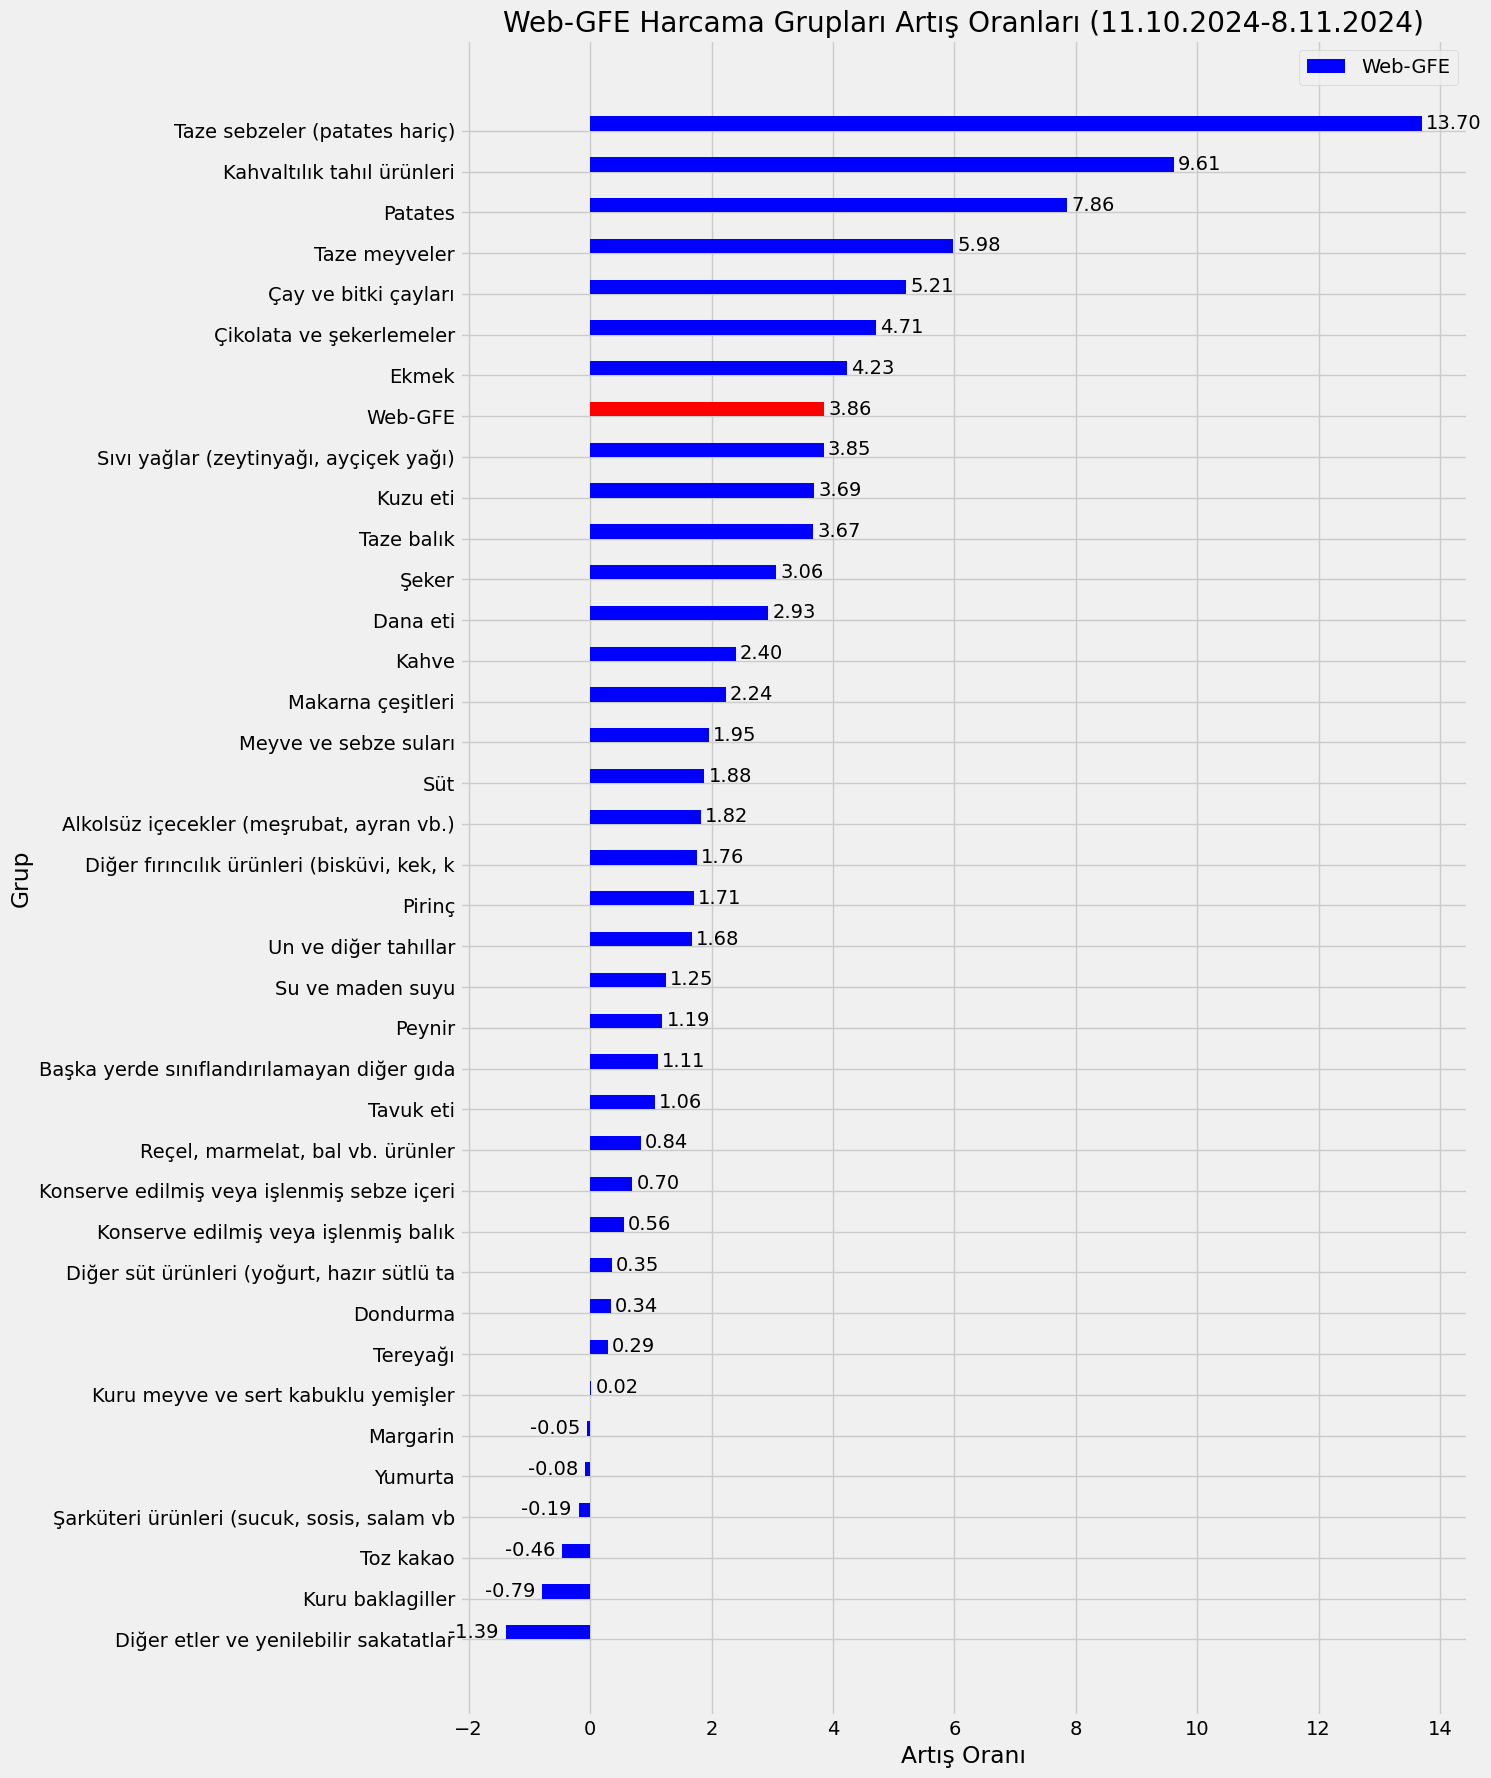

In [98]:
fig, ax = plt.subplots(figsize=(15, 18))
grouped=grouped.sort_values(by="Ağırlıklı_Artış")
x = np.arange(len(grouped.index))  # the label locations
width = 0.35  # the width of the bars
shortened_index = [label[:42] for label in grouped.index]
colors = ['red' if label == 'Web-GFE' else 'blue' for label in grouped.index]
rects2 = ax.barh(x + width/2, grouped['Ağırlıklı_Artış'], height=width, label='Web-GFE',color=colors)

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Grup')
ax.set_xlabel('Artış Oranı')
ax.set_title('Web-GFE Harcama Grupları Artış Oranları (11.10.2024-8.11.2024)')
ax.set_yticks(x)
ax.set_yticklabels(shortened_index)
ax.legend()

def add_labels_horizontal(rects):
    for rect in rects:
        width = rect.get_width()
        if width < 0:  # Negatif değerler için
            ax.annotate(f'{width:.2f}',
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(-5, 0),  # 5 points horizontal offset to the left
                        textcoords="offset points",
                        ha='right', va='center')
        else:  # Pozitif değerler için
            ax.annotate(f'{width:.2f}',
                        xy=(width, rect.get_y() + rect.get_height() / 2),
                        xytext=(3, 0),  # 3 points horizontal offset to the right
                        textcoords="offset points",
                        ha='left', va='center')


# Adding labels to bars in horizontal orientation
add_labels_horizontal(rects2)


plt.tight_layout()
plt.show()

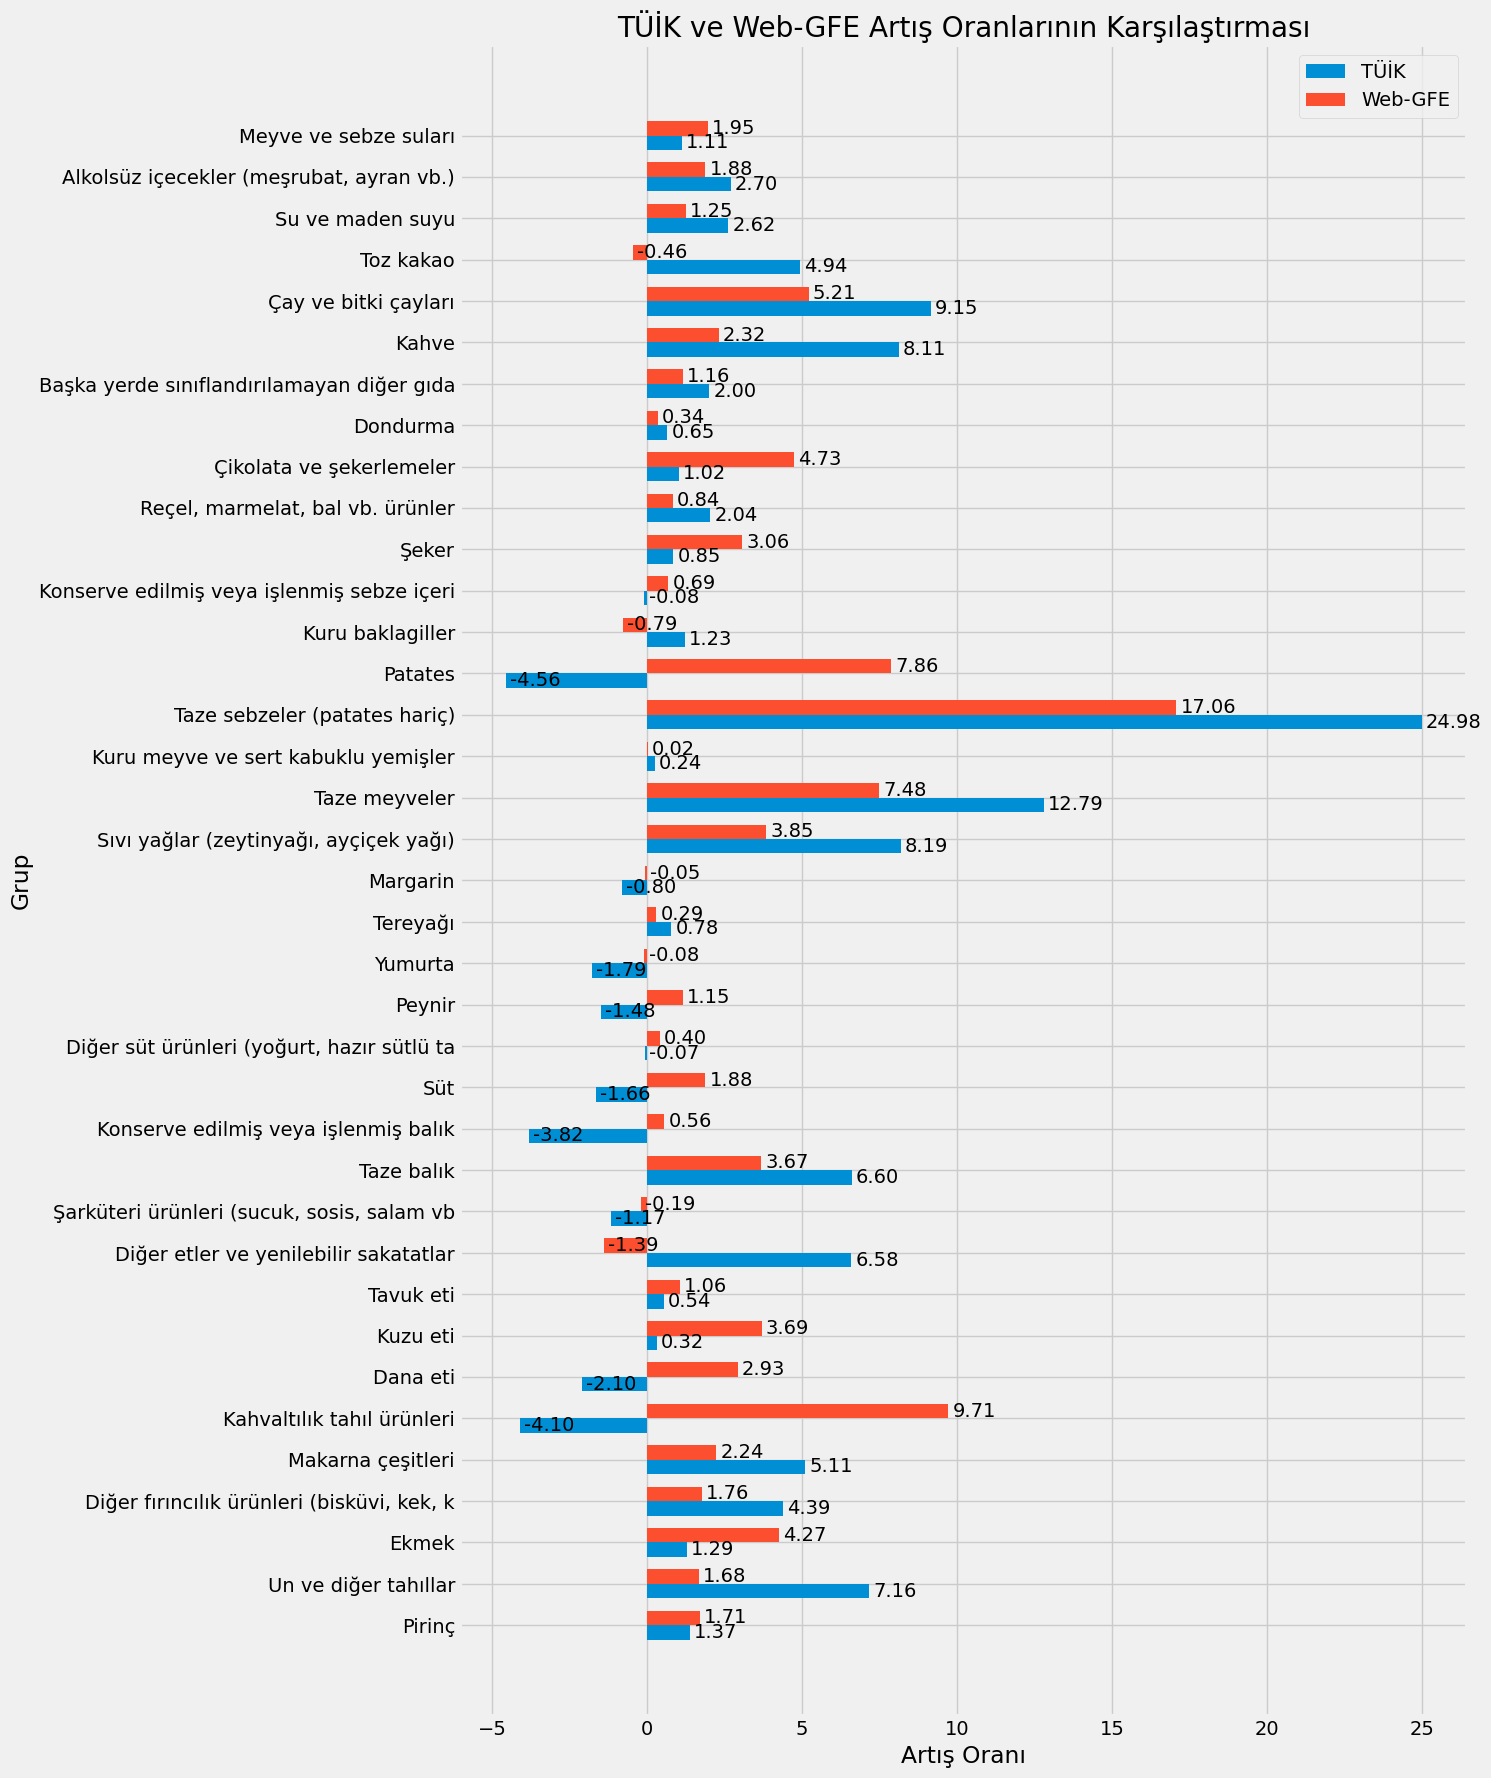

In [34]:
import numpy as np
plt.style.use("fivethirtyeight")
x = np.arange(len(grouped.index))  # the label locations
width = 0.35  # the width of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Plotting the bar chart with bar labels on the y-axis for better readability

def add_labels_horizontal(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

# Sadece ilk 20 karakteri göstermek için indeks isimlerini kısaltıyorum
shortened_index = [label[:42] for label in grouped.index]

# Plotting the horizontal bar chart with shortened index labels
fig, ax = plt.subplots(figsize=(15, 18))

# Horizontal bar chart
rects1 = ax.barh(x - width/2, grouped['TÜİK'], height=width, label='TÜİK')
rects2 = ax.barh(x + width/2, grouped['Ağırlıklı_Artış'], height=width, label='Web-GFE')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Grup')
ax.set_xlabel('Artış Oranı')
ax.set_title('TÜİK ve Web-GFE Artış Oranlarının Karşılaştırması')
ax.set_yticks(x)
ax.set_yticklabels(shortened_index)
ax.legend()

# Adding labels to bars in horizontal orientation
add_labels_horizontal(rects1)
add_labels_horizontal(rects2)

plt.tight_layout()
plt.show()



In [791]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler.loc["Gıda"]=gfe["GFE"].values

gida_index = endeksler.loc[['Gıda']]  # "Gıda Fiyat Endeksi"ni seç
other_indices = endeksler.drop('Gıda').sort_index()  # Geri kalanları alfabetik sıraya koy


endeksler = pd.concat([gida_index, other_indices])

    
        

    

gruplar = endeksler.index

In [381]:
import numpy as np
tege=pd.read_excel("1730465005111-1.Ekim_2024_Fiyatlar.xlsx")
tege=tege.set_index(pd.to_datetime(tege["Tarih"]))
del tege["Tarih"]
tege=tege.fillna(method="ffill")
tege=tege.fillna(method="bfill")
tege=pd.concat([tege.head(12),tege.tail(3)],axis=0)
tege

C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\734653414.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tege=tege.fillna(method="ffill")
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\734653414.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tege=tege.fillna(method="bfill")


,Antep Fıstığı,Armut,Ay Çekirdeği,Ayran,Ayva,Ayçiçek Yağı,Badem İçi,Baharat,Baklava,Bal,...,Zeytin,Zeytinyağı,Çarliston Biber,Çay,Çikolata Krem,Çikolata Tablet,Çilek,Üzüm,Şeftali,Şehriye
Tarih,,,,,,,,,,,,,,,,,,,,,
2023-08-01,594.862451,38.648758,104.274848,22.665863,19.90,34.284173,359.951856,357.042647,339.853240,199.396800,...,110.082953,232.059465,43.940856,216.680647,123.877979,320.793298,77.9000,48.366761,39.196668,22.557112
2023-09-01,656.973303,40.399762,111.665117,23.779008,19.90,35.610740,369.816559,375.557507,317.745836,219.995768,...,124.189428,255.122395,35.758780,257.861973,127.049662,336.041705,79.9125,45.873467,43.221132,23.799542
2023-10-01,716.385144,45.402846,118.527731,24.763828,19.90,36.077604,390.474487,404.967148,380.284877,227.683249,...,133.389788,264.428262,35.611273,241.018987,133.477060,364.220034,97.4000,49.051250,51.628159,25.421372
2023-11-01,712.241299,42.318087,118.787196,25.435093,28.90,36.874467,412.882782,420.747032,500.648260,239.681155,...,156.806226,273.383204,29.945659,248.117895,141.100070,374.517895,99.9250,53.952348,58.200641,25.421372
2023-12-01,730.327203,40.806849,109.475415,25.440672,41.15,37.769911,431.112665,426.679616,453.840394,237.083033,...,169.668834,279.831313,40.161585,253.759999,146.103899,424.192193,184.2250,64.355377,71.605524,25.421372
2024-01-01,749.080308,40.430998,109.939042,26.478781,46.90,39.156150,456.622441,464.407580,470.066468,265.752751,...,179.431516,299.879258,46.803303,258.604332,152.677237,436.269061,118.9000,87.464071,90.187833,27.735119
2024-02-01,736.425072,45.827357,108.377498,28.923531,50.40,40.331786,484.370865,488.890323,513.611661,272.465229,...,188.647191,301.856495,54.277524,263.145511,157.686182,462.105682,124.9000,74.481873,83.721647,27.735119
2024-03-01,705.990498,55.188826,110.384998,29.132502,55.90,39.307538,454.703544,511.022523,616.784531,254.634065,...,197.486312,310.403650,44.729349,250.943631,151.046255,503.657794,86.9000,64.772927,58.568405,37.000000
2024-04-01,719.242423,58.211774,152.531218,29.132502,55.90,43.097860,451.492656,576.665011,455.025206,300.744098,...,185.833380,444.497750,40.998239,279.246412,160.554660,491.015713,82.4000,64.772927,71.149194,37.000000


In [734]:
tüik=pd.read_excel("madde sepeti ve ortalama madde fiyatlari (turkiye).xls")
madde=tüik.iloc[5:,1]
sepet=pd.DataFrame()
sepet["Madde"]=madde


sepet=pd.concat([sepet,tüik.iloc[:133,135:]],axis=1)
sepet=sepet.head(128)
sepet=sepet.set_index("Madde")
sepet=sepet.T
sepet=sepet.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(sepet)))
sepet=sepet.replace(0, np.nan)
sepet=sepet.fillna(method="ffill")
sepet=sepet.fillna(method="bfill")

columns=sepet.columns.sort_values()
sepet=sepet[columns]
new_dates = pd.date_range(start="2022-05-31", end="2023-07-31", freq="M")

# Yeni tarihleri ekleyerek DataFrame'i genişletme
sepet = sepet.reindex(sepet.index.union(new_dates))

sepet=sepet.sort_index()

sepet=pd.concat([sepet,tege],axis=0)


sepet=sepet.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(sepet)))

def fill_nan_with_growth(series, noise_factor=0.01):
    # NaN değerlerin olduğu indeksleri bul
    nan_mask = series.isna()
    
    # Eğer seride NaN varsa
    if nan_mask.sum() > 0:
        # NaN değerlerden önceki ilk geçerli değeri bul
        first_valid_index = series[nan_mask].index[0] - pd.Timedelta(days=1)
        first_valid_value = series[:first_valid_index].dropna().iloc[-1]

        # NaN değerlerden sonraki ilk geçerli değeri bul
        last_valid_index = series[nan_mask].index[-1] + pd.Timedelta(days=1)
        last_valid_value = series[last_valid_index:].dropna().iloc[0]
        
        # NaN değerlerin sayısını bul
        nan_count = nan_mask.sum()
        
        # Başlangıçtan sona ulaşmak için aylık ortalama artış oranını hesapla
        growth_rate = (last_valid_value / first_valid_value) ** (1 / nan_count) - 1
        
        # NaN değerleri sırayla doldur
        for i, index in enumerate(series[nan_mask].index):
            # Aylık büyüme oranını kullanarak değeri hesapla
            new_value = first_valid_value * (1 + growth_rate) ** (i + 1)
            
            # Gürültü ekle
            noise = np.random.normal(loc=0, scale=new_value * noise_factor)
            series.loc[index] = new_value + noise

    return series

for col in sepet.columns:
    if sepet[col].isna().sum() > 0:  # Sütunda NaN değer varsa işlem yapıyoruz
        sepet[col] = fill_nan_with_growth(sepet[col], noise_factor=0.02)

sepet_fiyat=sepet.copy()
sepet=sepet.pct_change().dropna()
sepet_aylık=sepet*100
sepet=(1+sepet)
sepet=np.cumprod(sepet)*100
sepet_fiyat.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/sepet_fiyat.xlsx")




C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sepet=sepet.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(sepet)))
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sepet=sepet.replace(0, np.nan)
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sepet=sepet.fillna(method="ffill")
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

In [ ]:
from statsmodels.tsa.x13 import x13_arima_analysis
import random
random.seed(42)
np.random.seed(42)



# Set the path to the X13-ARIMA executable
x13_path = r'C:\Users\Bora\Desktop\x13as'
spec = """
outlier {
    method = addone;
    types = ao tc ls;
}
"""


sepet_sa = pd.DataFrame()
for col in sepet.columns:
    try:
            ayris = x13_arima_analysis(sepet[col], x12path=x13_path,outlier=True)
            sepet_sa[col] = ayris.seasadj
    except Exception as e:
            print(f"Error processing {col}: {e}")

In [736]:
sepet.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/sepet.xlsx")
sepet_sa.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/sepet_sa.xlsx")

In [737]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar=ağırlıklar["Ağırlık"]

In [738]:
sepet_sa_aylık=sepet_sa.pct_change().dropna()*100
for col in sepet_sa_aylık.columns:

        if col.endswith(" "):
            col1 = col[:-1]
            sepet_sa_aylık[col]=sepet_sa_aylık[col]*ağırlıklar.loc[col1]
        else:
            sepet_sa_aylık[col]=sepet_sa_aylık[col]*ağırlıklar.loc[col]

In [739]:
for col in sepet_aylık.columns:

        if col.endswith(" "):
            col1 = col[:-1]
            sepet_aylık[col]=sepet_aylık[col]*ağırlıklar.loc[col1]
        else:
            sepet_aylık[col]=sepet_aylık[col]*ağırlıklar.loc[col]

In [ ]:
gfe_sa=np.cumprod((sepet_sa_aylık.sum(axis=1)/100)+1)*100
gfe_sa=gfe_sa.sort_index()

In [741]:
gfe=np.cumprod((sepet_aylık.sum(axis=1)/100)+1)*100
gfe.loc["2016-01-31"]=100
gfe=gfe.sort_index()

In [742]:
gfe=pd.DataFrame(gfe)
gfe_sa=pd.DataFrame(gfe_sa)
gfe.columns=["TGFE"]
gfe_sa.columns=["TGFE"]

In [743]:
tge=pd.read_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/tgfe.xlsx")
tge=tge.set_index(pd.to_datetime(tge["Unnamed: 0"]))
del tge["Unnamed: 0"]

In [744]:
gfe.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/tgfe.xlsx")
gfe_sa.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/tgfe_sa.xlsx")

In [2]:
sepet=pd.read_csv("sepet.csv")
sepet=sepet.set_index(sepet["original_index"])
del sepet["original_index"]
#sepet["Değişim"]=((sepet.iloc[:,-1]/sepet.iloc[:,1])-1)*100
sepet

,Ürün,2024-10-11,2024-10-12,2024-10-13,2024-10-14,2024-10-15,2024-10-16,2024-10-17,2024-10-18,2024-10-19,...,2024-11-28,2024-11-29,2024-11-30,2024-12-01,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-07
original_index,,,,,,,,,,,,,,,,,,,,,
Beyaz Peynir,Tahsildaroğlu Dilimli Ezine peynir 450 Gr ( %4...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,...,229.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90
Beyaz Peynir,Tahsildaroğlu Ezine Peyniri 500 Gr ( %45 Keç...,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,...,229.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90,279.90
Meyve Suyu,Dimes % 100 Kırmızı Meyveler 1 lt,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,...,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
Süt,Baltalı % 100 Pastörize Keçi Sütü 1L,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,...,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50,142.50
Tulum Peyniri,Savak Erzincan Tulum Peyniri Kg % 100 Koyun Sütü,490.90,490.90,490.90,490.90,490.90,490.90,490.90,490.90,490.90,...,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90,539.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Konserve Balık,Shaku Sushi Sakura,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,...,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99,242.99
Baharat,Susam,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,...,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90,259.90
Baharat,Tarçın,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,...,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90,374.90


In [11]:
import pandas as pd
import re

import pandas as pd
import re

# Veriyi yükleyin
file_path = 'sepet.csv'  # Dosya yolunu buraya girin
data = pd.read_csv(file_path)

def is_multi_package(product_name):
    """
    Ürün adında çoklu paket ifadesi veya özel işaretli miktar olup olmadığını kontrol eder.
    Örneğin: '3X0,5 G', '4X1 G', '8x100 g', '4 x 1 L', '6*100 G' gibi ürünleri yakalar.
    """
    # Çoklu paket ifadelerini ve özel karakterli miktarları yakalayacak desen
    pattern = r'(\d+)\s?[xX×*]\s?(\d+[.,]?\d*)\s?(g|kg|ml|l|lt|adet|gr|G|KG|ML|L|LT|Adet|GR)?\b'
    product_name = product_name.strip()  # Fazladan boşlukları temizle
    return bool(re.search(pattern, product_name, re.IGNORECASE))

data = data[~data['Ürün'].apply(is_multi_package)]

# "Demet", "Adet" gibi ifadeleri kontrol et ve fiyatı aynen al
def is_piece_or_bunch(product_name):
    return bool(re.search(r'\b(demet|adet)\b', product_name, re.IGNORECASE))

# Miktarları düzeltme (virgül ve nokta işlemleri)
def correct_quantity_format(product_name):
    # Gram ve litre birimlerinde nokta olursa boşlukla değiştireceğiz,
    # ancak kilogram ve litre gibi birimler için nokta kalacak
    product_name = re.sub(r'(\d+)\.(\d+)\s?(G|g|mL|ml|Gr|gr)', r'\1\2 \3', product_name)  # 1.500G -> 1500 G, 1.500L -> 1500 L
    product_name = product_name.replace(',', '.')  # Virgülü noktaya çevir
    return product_name

# Yumurtalar için miktar çekme
def extract_egg_quantity(product_name):
    pattern = r"(\d+)[^\d]*(li|lü|lu|Lu|Lü|Li|lı|Lı)"  # "6'lı", "12'li" gibi ifadeler için desen
    match = re.search(pattern, product_name)
    if match:
        return int(match.group(1))  # Miktarı çıkar
    return None  # Eğer "li" ifadesi yoksa None döner

# "Adet" kelimesinden önceki sayıyı al
def extract_quantity_before_adet(product_name):
    match = re.search(r'(\d+)\s*(adet)', product_name, re.IGNORECASE)
    if match:
        return int(match.group(1))  # "adet" kelimesinden önceki sayıyı al
    return None  # Eğer "adet" kelimesi yoksa None döner

# Birim ve miktar bilgilerini çıkaran fonksiyon
def extract_quantity_unit(product_name):
    # Ürün adını düzelt
    product_name = correct_quantity_format(product_name)

    # Yumurtaları kontrol et: 6'Lı, adetli gibi ifadeler
    if 'yumurta' in product_name.lower():
        quantity = extract_egg_quantity(product_name)
        if quantity:  # Eğer miktar bulunmuşsa
            return quantity, 'adet'  # Yumurta ürünlerinde miktar her zaman adet
        else:
            # Eğer "yumurta" varsa ama miktar "li" ile tespit edilemiyorsa, "adet" kelimesinin öncesindeki sayıyı al
            quantity = extract_quantity_before_adet(product_name)
            if quantity:
                return quantity, 'adet'
            return 1, 'adet'  # Eğer yine de bulunamazsa 1 adet olarak kabul et

    # Aralık belirtilmiş ürünleri kontrol et (ör. 1200/1300 Kg)
    if re.search(r'\d+/\d+\s?Kg', product_name, re.IGNORECASE):
        return None, 'kg'  # 1 Kg fiyatı olarak işlenecek
    
    # Eğer adet bilgisi bulunamadıysa "adet" kelimesiyle arama yap
    if 'adet' in product_name.lower():
        return 1, 'adet'  # Eğer "adet" kelimesi varsa, miktar 1 olarak kabul edilir

    # Standart miktar ve birim çıkarımı
    match = re.search(r'(\d+(\.\d+)?)(\s?(Gr|Kg|L|ml|g|lt|l|G))', product_name, re.IGNORECASE)
    if match:
        quantity = float(match.group(1))  # Miktar
        unit = match.group(4).lower()    # Birim
        return quantity, unit
    
    # Eğer sadece birim varsa
    unit_match = re.search(r'\b(Kg|L|Gr|ml|lt|l|kg)\b', product_name, re.IGNORECASE)
    if unit_match:
        return None, unit_match.group(1).lower()
    
    return None, None

# Yumurtaların adet fiyatını hesaplamak için fonksiyon
def calculate_egg_price(row, date):
    product_name = row['Ürün']
    
    # Yumurta ürünlerini kontrol et
    if 'yumurta' in product_name.lower():
        quantity, unit = extract_quantity_unit(product_name)
        if quantity:  # Eğer miktar bulunmuşsa
            return row[date] / quantity  # Yumurta ürünleri için fiyatı adete böl
    return row[date]  # Diğer ürünler için fiyatı değiştirme

# Çoklu paket ürünlerinin birim fiyatını NaN yap
data.loc[data['Ürün'].apply(is_multi_package), 'Birim Fiyat'] = None

# Adet veya demet gibi ifadeler olan ürünlerin birim fiyatını fiyatla aynı yap
data.loc[data['Ürün'].apply(is_piece_or_bunch), 'Birim Fiyat'] = None  # Adet/demet için fiyatı değiştirmedik

# Ürün adından miktar ve birim bilgilerini çıkar
data['Miktar'], data['Birim'] = zip(*data['Ürün'].apply(extract_quantity_unit))

# Birim dönüşümleri ve birim fiyat hesaplama fonksiyonu
def calculate_unit_price(row, price_column, date):
    # Birim dönüşümleri
    if row['Birim'] in ['ml', 'g', 'G', 'Gr', 'gr', 'Ml'] and pd.notna(row['Miktar']):
        # Mililitreyi litreye, gramı kilograma çevir
        adjusted_quantity = row['Miktar'] / 1000
    else:
        adjusted_quantity = row['Miktar']  # Diğer birimler için olduğu gibi al

    # Birim fiyat hesaplama
    if pd.isna(adjusted_quantity) and row['Birim'] in ['kg', 'l', 'Kg', 'L']:  # Miktar yok ama birim var
        return row[date]  # Zaten birim fiyatı
    elif pd.notna(adjusted_quantity):  # Miktar belirtilmişse birim fiyatı hesapla
        return row[date] / adjusted_quantity
    return None  # Diğer durumları atla

# Tüm tarih sütunları üzerinden her birim fiyatı hesaplayın
date_columns = [col for col in data.columns if re.match(r'\d{4}-\d{2}-\d{2}', col)]  # Tarih sütunlarını seçin

# Her bir tarih için birim fiyat hesaplayın
for date in date_columns:
    data[date + ' Birim Fiyat'] = data.apply(lambda row: calculate_egg_price(row, date), axis=1)  # Yumurtalar için adet fiyatı ekle
    data[date + ' Birim Fiyat'] = data.apply(lambda row: calculate_unit_price(row, date + ' Birim Fiyat', date), axis=1)  # Diğer ürünler için birim fiyatları hesapla

    # Birim fiyat NaN ise, tarih verisini birim fiyat olarak kullan
    data[date + ' Birim Fiyat'] = data[date + ' Birim Fiyat'].fillna(data[date])

# Sonuçları filtrele ve önemli sütunları göster
filtered_result = data.dropna(subset=[col for col in data.columns if 'Birim Fiyat' in col])[['Ürün', 'Miktar', 'Birim'] + [col for col in data.columns if 'Birim Fiyat' in col]]

try:
    data=data.set_index("original_index") 
    su=data.loc["Su"]
    su=su[~su["Ürün"].str.contains("033|05|066|075|0.33 ml|0.75 ml|0.5 ml|0.50 ml")]
    data=data.drop("Su",axis=0)
    data=pd.concat([data,su],axis=0)

    birimler=[col for col in data.columns if 'Birim Fiyat' in col][1:]
    birim=data[birimler].groupby(level=0).mean()
    birim=birim.T.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(birim.T)))
    birim.to_csv("birim.csv")
except:
    
    su=data.loc["Su"]
    su=su[~su["Ürün"].str.contains("033|05|066|075|0.33 ml|0.75 ml|0.5 ml|0.50 ml")]
    data=data.drop("Su",axis=0)
    data=pd.concat([data,su],axis=0)

    birimler=[col for col in data.columns if 'Birim Fiyat' in col][1:]
    birim=data[birimler].groupby(level=0).mean()
    birim=birim.T.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(birim.T)))
    birim.to_csv("birim.csv")

In [4]:
kıvırcık=sepet.loc["Kıvırcık"]
kıvırcık=kıvırcık[kıvırcık["Ürün"].str.contains("Adet|adet", regex=True)]
sepet=sepet.drop("Kıvırcık",axis=0)
sepet=pd.concat([sepet,kıvırcık],axis=0)

In [5]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)

from datetime import datetime,timedelta
bugün=datetime.now().strftime("%Y-%m-%d")

gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)

In [6]:
endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
endeks_sutunlari=endeks_sutunlari.drop(endeks_sutunlari.filter(like="Ağırlıklı").columns,axis=1)
for col in endeks_sutunlari.columns[1:]:
    degisim=(((sepet[col[7:]]/sepet.iloc[:,1])-1)*100).fillna(0).groupby(level=0).mean().sort_index()
    ağırlıklar[col]=ağırlıklar["Endeks_2024-10-11"]*(1+(degisim/100))
    ağırlıklar[f"Ağırlıklı {col}"]=ağırlıklar[col]*ağırlıklar["Ağırlık"]
    gfe.loc[pd.to_datetime(col[7:])]=ağırlıklar[f"Ağırlıklı {col}"].sum()


In [7]:

gfe.to_csv("gfe.csv",index=True)


endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
endeksler = [col for col in ağırlıklar.columns if col.startswith('Endeks_')]
ağırlıklar[endeksler].to_csv("endeksler.csv",index=True)



sepet.to_csv("sepet.csv")

In [8]:


degisim=(((sepet.iloc[:,-1]/sepet.iloc[:,1])-1)*100).fillna(0).groupby(level=0).mean().sort_index()

ağırlıklar["Değişim"]=degisim
ağırlıklar.to_csv("ağırlıklar.csv",index=True)


"""ağırlıklar[f"Endeks_{bugün}"]=ağırlıklar["Endeks_2024-10-11"]*(1+(ağırlıklar["Değişim"]/100))

ağırlıklar[f"Ağırlıklı Endeks_{bugün}"]=ağırlıklar[f"Endeks_{bugün}"]*ağırlıklar["Ağırlık"]
gfe.loc[pd.to_datetime(bugün)]=ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
gfe.to_csv("gfe.csv",index=True)


endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
endeksler = [col for col in ağırlıklar.columns if col.startswith('Endeks_')]
ağırlıklar[endeksler].to_csv("endeksler.csv",index=True)


ağırlıklar.to_csv("ağırlıklar.csv",index=True)"""

'ağırlıklar[f"Endeks_{bugün}"]=ağırlıklar["Endeks_2024-10-11"]*(1+(ağırlıklar["Değişim"]/100))\n\nağırlıklar[f"Ağırlıklı Endeks_{bugün}"]=ağırlıklar[f"Endeks_{bugün}"]*ağırlıklar["Ağırlık"]\ngfe.loc[pd.to_datetime(bugün)]=ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()\ngfe.to_csv("gfe.csv",index=True)\n\n\nendeks_sutunlari = ağırlıklar.filter(like=\'Endeks_\')\nendeksler = [col for col in ağırlıklar.columns if col.startswith(\'Endeks_\')]\nağırlıklar[endeksler].to_csv("endeksler.csv",index=True)\n\n\nağırlıklar.to_csv("ağırlıklar.csv",index=True)'

In [9]:
import pandas as pd
import re

# Veriyi yükleyin
file_path = 'sepet.csv'  # Dosya yolunu buraya girin
data = pd.read_csv(file_path)

def is_multi_package(product_name):
    """
    Ürün adında çoklu paket ifadesi veya özel işaretli miktar olup olmadığını kontrol eder.
    Örneğin: '3X0,5 G', '4X1 G', '8x100 g', '4 x 1 L', '6*100 G' gibi ürünleri yakalar.
    """
    # Çoklu paket ifadelerini ve özel karakterli miktarları yakalayacak desen
    pattern = r'(\d+)\s?[xX×*]\s?(\d+[.,]?\d*)\s?(g|kg|ml|l|lt|adet|gr|G|KG|ML|L|LT|Adet|GR)?\b'
    product_name = product_name.strip()  # Fazladan boşlukları temizle
    return bool(re.search(pattern, product_name, re.IGNORECASE))

data = data[~data['Ürün'].apply(is_multi_package)]

# "Demet", "Adet" gibi ifadeleri kontrol et ve fiyatı aynen al
def is_piece_or_bunch(product_name):
    return bool(re.search(r'\b(demet|adet)\b', product_name, re.IGNORECASE))

# Miktarları düzeltme (virgül ve nokta işlemleri)
def correct_quantity_format(product_name):
    # Gram ve litre birimlerinde nokta olursa boşlukla değiştireceğiz,
    # ancak kilogram ve litre gibi birimler için nokta kalacak
    product_name = re.sub(r'(\d+)\.(\d+)\s?(G|g|mL|ml|Gr|gr)', r'\1\2 \3', product_name)  # 1.500G -> 1500 G, 1.500L -> 1500 L
    product_name = product_name.replace(',', '.')  # Virgülü noktaya çevir
    return product_name

# Yumurtalar için miktar çekme
def extract_egg_quantity(product_name):
    pattern = r"(\d+)[^\d]*(li|lü|lu|Lu|Lü|Li|lı|Lı)"  # "6'lı", "12'li" gibi ifadeler için desen
    match = re.search(pattern, product_name)
    if match:
        return int(match.group(1))  # Miktarı çıkar
    return None  # Eğer "li" ifadesi yoksa None döner

# "Adet" kelimesinden önceki sayıyı al
def extract_quantity_before_adet(product_name):
    match = re.search(r'(\d+)\s*(adet)', product_name, re.IGNORECASE)
    if match:
        return int(match.group(1))  # "adet" kelimesinden önceki sayıyı al
    return None  # Eğer "adet" kelimesi yoksa None döner

# Birim ve miktar bilgilerini çıkaran fonksiyon
def extract_quantity_unit(product_name):
    # Ürün adını düzelt
    product_name = correct_quantity_format(product_name)

    # Yumurtaları kontrol et: 6'Lı, adetli gibi ifadeler
    if 'yumurta' in product_name.lower():
        quantity = extract_egg_quantity(product_name)
        if quantity:  # Eğer miktar bulunmuşsa
            return quantity, 'adet'  # Yumurta ürünlerinde miktar her zaman adet
        else:
            # Eğer "yumurta" varsa ama miktar "li" ile tespit edilemiyorsa, "adet" kelimesinin öncesindeki sayıyı al
            quantity = extract_quantity_before_adet(product_name)
            if quantity:
                return quantity, 'adet'
            return 1, 'adet'  # Eğer yine de bulunamazsa 1 adet olarak kabul et

    # Aralık belirtilmiş ürünleri kontrol et (ör. 1200/1300 Kg)
    if re.search(r'\d+/\d+\s?Kg', product_name, re.IGNORECASE):
        return None, 'kg'  # 1 Kg fiyatı olarak işlenecek
    
    # Eğer adet bilgisi bulunamadıysa "adet" kelimesiyle arama yap
    if 'adet' in product_name.lower():
        return 1, 'adet'  # Eğer "adet" kelimesi varsa, miktar 1 olarak kabul edilir

    # Standart miktar ve birim çıkarımı
    match = re.search(r'(\d+(\.\d+)?)(\s?(Gr|Kg|L|ml|g|lt|l|G))', product_name, re.IGNORECASE)
    if match:
        quantity = float(match.group(1))  # Miktar
        unit = match.group(4).lower()    # Birim
        return quantity, unit
    
    # Eğer sadece birim varsa
    unit_match = re.search(r'\b(Kg|L|Gr|ml|lt|l|kg)\b', product_name, re.IGNORECASE)
    if unit_match:
        return None, unit_match.group(1).lower()
    
    return None, None

# Yumurtaların adet fiyatını hesaplamak için fonksiyon
def calculate_egg_price(row, date):
    product_name = row['Ürün']
    
    # Yumurta ürünlerini kontrol et
    if 'yumurta' in product_name.lower():
        quantity, unit = extract_quantity_unit(product_name)
        if quantity:  # Eğer miktar bulunmuşsa
            return row[date] / quantity  # Yumurta ürünleri için fiyatı adete böl
    return row[date]  # Diğer ürünler için fiyatı değiştirme

# Çoklu paket ürünlerinin birim fiyatını NaN yap
data.loc[data['Ürün'].apply(is_multi_package), 'Birim Fiyat'] = None

# Adet veya demet gibi ifadeler olan ürünlerin birim fiyatını fiyatla aynı yap
data.loc[data['Ürün'].apply(is_piece_or_bunch), 'Birim Fiyat'] = None  # Adet/demet için fiyatı değiştirmedik

# Ürün adından miktar ve birim bilgilerini çıkar
data['Miktar'], data['Birim'] = zip(*data['Ürün'].apply(extract_quantity_unit))

# Birim dönüşümleri ve birim fiyat hesaplama fonksiyonu
def calculate_unit_price(row, price_column, date):
    # Birim dönüşümleri
    if row['Birim'] in ['ml', 'g', 'G', 'Gr', 'gr', 'Ml'] and pd.notna(row['Miktar']):
        # Mililitreyi litreye, gramı kilograma çevir
        adjusted_quantity = row['Miktar'] / 1000
    else:
        adjusted_quantity = row['Miktar']  # Diğer birimler için olduğu gibi al

    # Birim fiyat hesaplama
    if pd.isna(adjusted_quantity) and row['Birim'] in ['kg', 'l', 'Kg', 'L']:  # Miktar yok ama birim var
        return row[date]  # Zaten birim fiyatı
    elif pd.notna(adjusted_quantity):  # Miktar belirtilmişse birim fiyatı hesapla
        return row[date] / adjusted_quantity
    return None  # Diğer durumları atla

# Tüm tarih sütunları üzerinden her birim fiyatı hesaplayın
date_columns = [col for col in data.columns if re.match(r'\d{4}-\d{2}-\d{2}', col)]  # Tarih sütunlarını seçin

# Her bir tarih için birim fiyat hesaplayın
for date in date_columns:
    data[date + ' Birim Fiyat'] = data.apply(lambda row: calculate_egg_price(row, date), axis=1)  # Yumurtalar için adet fiyatı ekle
    data[date + ' Birim Fiyat'] = data.apply(lambda row: calculate_unit_price(row, date + ' Birim Fiyat', date), axis=1)  # Diğer ürünler için birim fiyatları hesapla

    # Birim fiyat NaN ise, tarih verisini birim fiyat olarak kullan
    data[date + ' Birim Fiyat'] = data[date + ' Birim Fiyat'].fillna(data[date])

# Sonuçları filtrele ve önemli sütunları göster
filtered_result = data.dropna(subset=[col for col in data.columns if 'Birim Fiyat' in col])[['Ürün', 'Miktar', 'Birim'] + [col for col in data.columns if 'Birim Fiyat' in col]]

try:
    data=data.set_index("original_index") 
    su=data.loc["Su"]
    su=su[~su["Ürün"].str.contains("033|05|066|075|0.33 ml|0.75 ml|0.5 ml|0.50 ml")]
    data=data.drop("Su",axis=0)
    data=pd.concat([data,su],axis=0)

    birimler=[col for col in data.columns if 'Birim Fiyat' in col][1:]
    birim=data[birimler].groupby(level=0).mean()
    birim=birim.T.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(birim.T)))
    birim.to_csv("birim.csv")
except:
    
    su=data.loc["Su"]
    su=su[~su["Ürün"].str.contains("033|05|066|075|0.33 ml|0.75 ml|0.5 ml|0.50 ml")]
    data=data.drop("Su",axis=0)
    data=pd.concat([data,su],axis=0)

    birimler=[col for col in data.columns if 'Birim Fiyat' in col][1:]
    birim=data[birimler].groupby(level=0).mean()
    birim=birim.T.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(birim.T)))
    birim.to_csv("birim.csv")


In [10]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
import numpy as np
import pandas as pd
gfe = pd.read_csv("gfe.csv")
gfe = gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe = gfe.drop("Tarih", axis=1)

endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)


endeksler.loc["Gıda"]=gfe["GFE"].values



gida_index = endeksler.loc[['Gıda']]  # "Gıda Fiyat Endeksi"ni seç
other_indices = endeksler.drop('Gıda').sort_index()  # Geri kalanları alfabetik sıraya koy
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar=ağırlıklar["Ağırlık"]

endeksler = pd.concat([gida_index, other_indices])
endeksler1=endeksler.T
endeksler1=endeksler1.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler1))))
endeksler1=endeksler1.drop("Gıda",axis=1)
endeksler_sa=pd.DataFrame()
from statsmodels.tsa.statespace.structural import UnobservedComponents

for col in endeksler1.columns:
    model=UnobservedComponents(endeksler1[col],level="local level",seasonal=7,stochastic_seasonal=True)
    results=model.fit()
    seasonal=results.smoothed_state[1]
    sa=endeksler1[col]-seasonal
    endeksler_sa[col]=sa

for col in endeksler1.columns:
    endeksler_sa[col]=endeksler_sa[col]*ağırlıklar.loc[col]
gfe_sa=endeksler_sa.sum(axis=1)

        

    
sa=pd.DataFrame()
gruplar = endeksler.index
for selected_group in gruplar:
    selected_group_data = endeksler.loc[selected_group]

    selected_group_data=pd.DataFrame(selected_group_data)

        # Datetime index'i atıyoruz
    selected_group_data.index = gfe.index
    selected_group_data["Endeks_2024-10-11"]=100
    model=UnobservedComponents(selected_group_data.iloc[:,0],level="local level",seasonal=7,stochastic_seasonal=True)
    results=model.fit()
    seasonal=results.smoothed_state[1]
    seasonal_adjuested=np.round(selected_group_data[selected_group]-seasonal,2)
    sa[selected_group]=seasonal_adjuested

gfe_sa.to_csv("gfesa.csv")
sa.to_csv("sa.csv")

endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(endeksler)))
ağırlıklar=pd.read_excel("Weights_2022.xlsx")
cols=ağırlıklar["Unnamed: 1"].dropna().iloc[2:130].values
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")
ağırlıklar.columns=["Grup","Ağırlık"]
endeksler=endeksler[cols]
gruplar=pd.concat([ağırlıklar.reset_index().drop("index",axis=1),endeksler.T.reset_index().iloc[:,1:]],axis=1)
weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()

# Rename columns for clarity
weighted_sums.columns = ['Grup'] + [f'{col}_Toplam' for col in gruplar.columns[2:]]
# Calculate total weight for each group
total_weights = gruplar.groupby('Grup')['Ağırlık'].sum().reset_index()
total_weights.columns = ['Grup', 'Toplam_Ağırlık']

# Merge total weights with weighted sums
weighted_sums = pd.merge(weighted_sums, total_weights, on='Grup')

# Calculate indices for each date by dividing weighted sum by total weight
for col in weighted_sums.columns[1:-1]:  # Exclude 'Grup' and 'Toplam_Ağırlık'
    weighted_sums[col] = weighted_sums[col] / weighted_sums['Toplam_Ağırlık']

# Drop 'Toplam_Ağırlık' for display purposes
weighted_indices = weighted_sums.drop(columns=['Toplam_Ağırlık'])

weighted_indices=weighted_indices.T
cols=weighted_indices.iloc[0,:]
weighted_indices.columns=cols
weighted_indices=weighted_indices.iloc[1:,:]
weighted_indices=weighted_indices.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(weighted_indices)))


ağırlıklar=pd.read_excel("Weights_2022.xlsx")
cols=ağırlıklar["Unnamed: 1"].dropna().iloc[2:130].values
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")
ağırlıklar.columns=["Grup","Ağırlık"]
endeksler=endeksler[cols]
gruplar=pd.concat([ağırlıklar.reset_index().drop("index",axis=1),endeksler.T.reset_index().iloc[:,1:]],axis=1)
weighted_sums = gruplar.groupby('Grup').apply(lambda group: group.iloc[:, 2:].mul(group['Ağırlık'], axis=0).sum()).reset_index()

# Rename columns for clarity
weighted_sums.columns = ['Grup'] + [f'{col}_Toplam' for col in gruplar.columns[2:]]
# Calculate total weight for each group
total_weights = gruplar.groupby('Grup')['Ağırlık'].sum().reset_index()
total_weights.columns = ['Grup', 'Toplam_Ağırlık']

# Merge total weights with weighted sums
weighted_sums = pd.merge(weighted_sums, total_weights, on='Grup')

# Calculate indices for each date by dividing weighted sum by total weight
for col in weighted_sums.columns[1:-1]:  # Exclude 'Grup' and 'Toplam_Ağırlık'
    weighted_sums[col] = weighted_sums[col] / weighted_sums['Toplam_Ağırlık']

# Drop 'Toplam_Ağırlık' for display purposes
weighted_indices = weighted_sums.drop(columns=['Toplam_Ağırlık'])

weighted_indices=weighted_indices.T
cols=weighted_indices.iloc[0,:]
weighted_indices.columns=cols
weighted_indices=weighted_indices.iloc[1:,:]
weighted_indices=weighted_indices.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(weighted_indices)))

indice_sa=pd.DataFrame()
for col in weighted_indices.columns:
    weighted_indices[col]=weighted_indices[col].astype(float)
    model=UnobservedComponents(weighted_indices[col],level="local level",seasonal=7,stochastic_seasonal=True)
    results=model.fit()
    seasonal=results.smoothed_state[1]
    seasonal_adjuested=np.round(weighted_indices[col]-seasonal,2)
    indice_sa[col]=seasonal_adjuested
indice_sa.to_csv("indice_sa.csv")

c:\Users\Makdos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Makdos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Makdos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Makdos\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [61]:
aylık=np.round(((gfe.resample('M').mean().iloc[-1]/gfe.resample('M').mean().iloc[-2])-1)*100,2)

C:\Users\Makdos\AppData\Local\Temp\ipykernel_83752\1748037038.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylık=np.round(((gfe.resample('M').mean().iloc[-1]/gfe.resample('M').mean().iloc[-2])-1)*100,2)


In [67]:
gfe.loc["2024-10-12"]

GFE    100.105646
Name: 2024-10-12 00:00:00, dtype: float64

In [56]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
del endeksler["Ürün"]
endeksler["Değişim"]=((endeksler.iloc[:,-1]/endeksler.iloc[:,0])-1)*100
endeksler

,Endeks_2024-10-11,Endeks_2024-10-12,Endeks_2024-10-13,Endeks_2024-10-14,Endeks_2024-10-15,Endeks_2024-10-16,Endeks_2024-10-17,Endeks_2024-10-18,Endeks_2024-10-19,Endeks_2024-10-20,...,Endeks_2024-10-31,Endeks_2024-11-01,Endeks_2024-11-02,Endeks_2024-11-03,Endeks_2024-11-04,Endeks_2024-11-05,Endeks_2024-11-06,Endeks_2024-11-07,Endeks_2024-11-08,Değişim
Ürün,,,,,,,,,,,,,,,,,,,,,
Pirinç,100,100.000000,100.000000,104.134813,103.813727,103.813727,103.813727,103.813727,103.357897,103.357897,...,103.734033,103.734033,103.645140,103.645140,103.645140,103.645140,103.645140,104.375400,101.710804,1.710804
Buğday Unu,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.505967,100.505967,100.505967,...,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,101.562036,1.562036
Bebek Sütü (Toz Karışım),100,100.000000,100.000000,100.000000,100.648213,100.648213,98.948425,98.948425,98.948425,98.948425,...,100.631592,100.631592,100.626240,100.626240,100.626240,100.626240,100.626240,100.626240,101.699224,1.699224
Bulgur,100,100.335517,100.335517,104.122568,104.122568,104.514207,104.514207,104.514207,104.872435,104.435169,...,105.698307,105.698307,105.621302,105.621302,105.621302,105.621302,105.621302,105.988268,102.070302,2.070302
Ekmek,100,100.000000,100.000000,101.265957,101.265957,101.265957,101.265957,101.265957,101.265957,101.265957,...,102.175406,102.175406,103.733239,103.733239,104.456108,104.456108,104.456108,104.456108,104.265107,4.265107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gazoz Meyveli,100,100.000000,100.000000,100.224921,100.224921,100.336764,100.336764,100.224921,100.224921,100.224921,...,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,102.663218,2.663218
Kola,100,99.936143,99.936143,99.936143,99.936143,101.564164,101.564164,101.112936,101.112936,101.112936,...,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.144927,2.144927
Soğuk Çay,100,100.000000,100.000000,100.000000,100.000000,100.332226,100.332226,100.465340,100.685595,100.685595,...,100.682948,100.682948,100.682948,100.682948,100.682948,100.680322,100.677715,100.677715,101.615214,1.615214


In [57]:
from datetime import datetime
today = datetime.today().strftime("%d-%m-%Y")

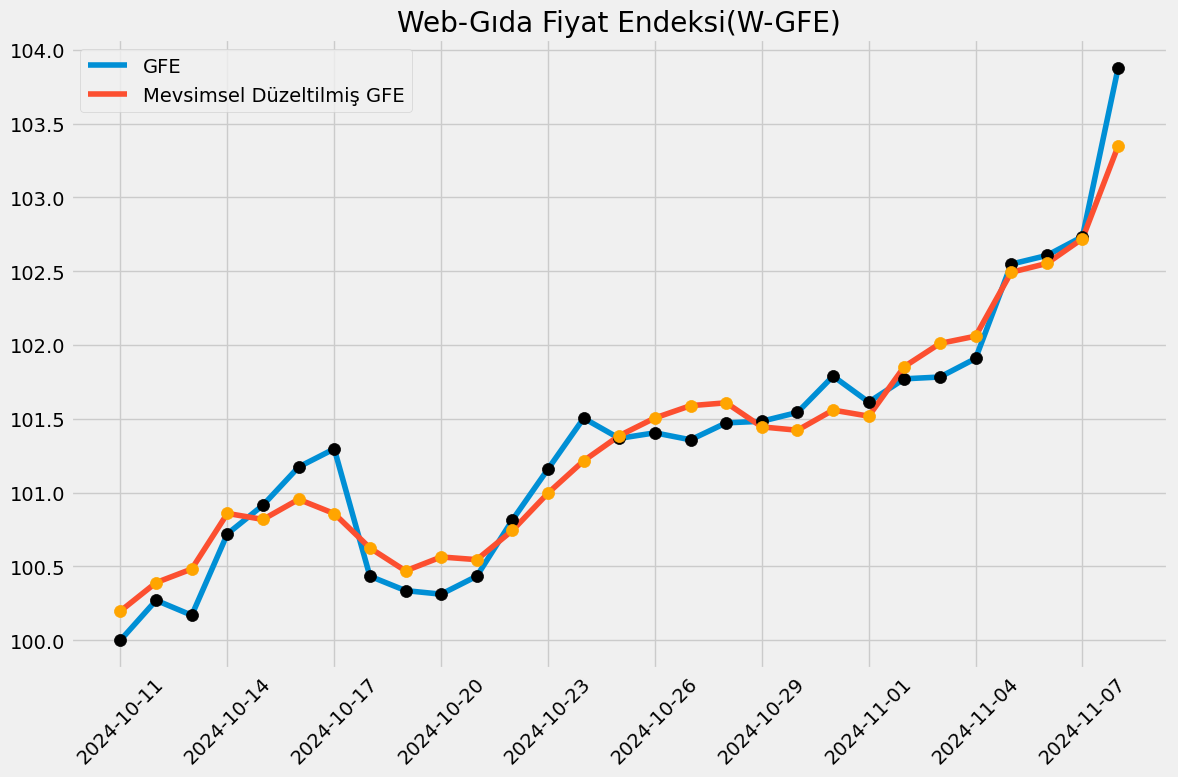

In [53]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web-Gıda Fiyat Endeksi(W-GFE)")
plt.plot(gfe["GFE"],label="GFE")
plt.plot(gfe["Adjusted"],label="Mevsimsel Düzeltilmiş GFE")
plt.scatter(x=gfe["GFE"].index,y=gfe["GFE"].values,color="black",zorder=3,s=75)
plt.scatter(x=gfe["Adjusted"].index,y=gfe["Adjusted"].values,color="orange",zorder=3,s=75)
plt.xticks(gfe.index[::3],rotation=45)
plt.legend()
plt.tight_layout()
from datetime import date
plt.savefig("gfe_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

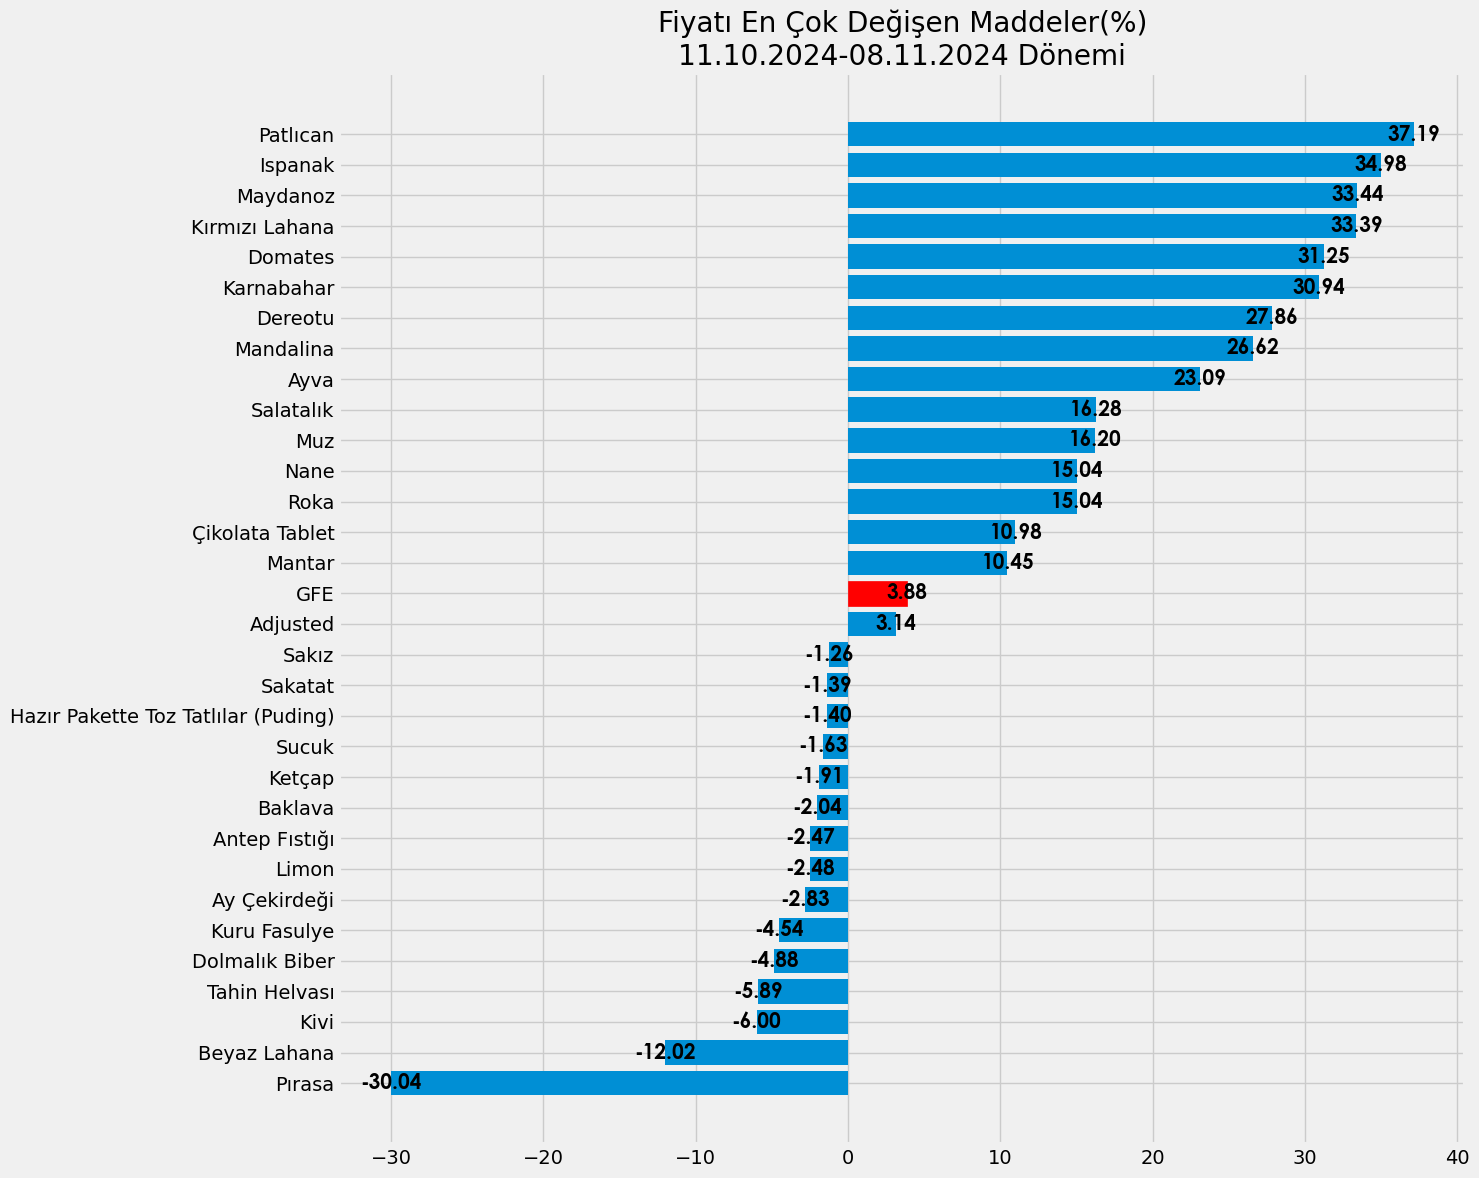

In [60]:

fark=endeksler["Değişim"]
veri=pd.concat([fark.sort_values().head(15),fark.sort_values().tail(15)],axis=0)
veri=pd.concat([veri,((gfe.iloc[-1]/gfe.iloc[0])-1)*100],axis=0)
veri=veri.sort_values()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,12))
first=gfe.index[0].strftime("%d.%m.%Y")
last=gfe.index[-1].strftime("%d.%m.%Y")
plt.title(f"Fiyatı En Çok Değişen Maddeler(%)\n{first}-{last} Dönemi")
bars=plt.barh(y=veri.index,width=veri.values)
for bar, label in zip(bars, veri.index):
    if label == "GFE":
        bar.set_color('red')
for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.savefig("ürünler_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

plt.show()

In [63]:
sepet=sepet.sort_values(by="Değişim")

In [64]:
sepet=sepet.set_index("Ürün")

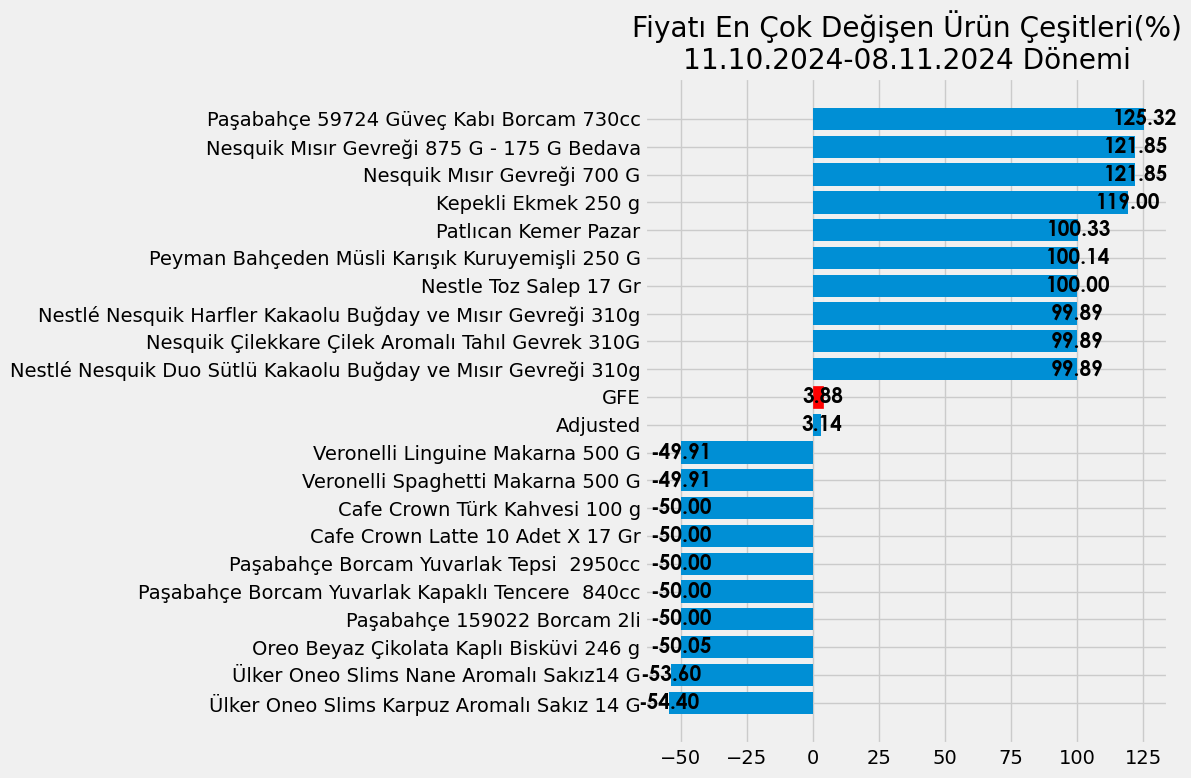

In [65]:

fark=sepet["Değişim"]
veri=pd.concat([fark.sort_values().head(10),fark.sort_values().tail(10)],axis=0)
veri=pd.concat([veri,((gfe.iloc[-1]/gfe.iloc[0])-1)*100],axis=0)
veri=veri.sort_values()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
first=gfe.index[0].strftime("%d.%m.%Y")
last=gfe.index[-1].strftime("%d.%m.%Y")
plt.title(f"Fiyatı En Çok Değişen Ürün Çeşitleri(%)\n{first}-{last} Dönemi")
bars=plt.barh(y=veri.index,width=veri.values)
for bar, label in zip(bars, veri.index):
    if label == "GFE":
        bar.set_color('red')
for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.savefig("çeşitler_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()


In [66]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")

In [67]:
import numpy as np
satrim=np.sum(endeksler["Değişim"].sort_values()[31:88].values*(ağırlıklar.loc[endeksler["Değişim"].sort_values()[31:88].index]["Ağırlık"]/ağırlıklar.loc[endeksler["Değişim"].sort_values()[31:88].index]["Ağırlık"].sum()))

In [68]:
medyan=endeksler["Değişim"].median()

In [69]:
esit=endeksler["Değişim"].mean()

In [81]:
egilim=pd.DataFrame()
egilim["W-GFE"]=[(((gfe["GFE"].loc["2024-11-08"]/100)-1)*100)]
egilim["SATRIM"]=[satrim]
egilim["Medyan"]=[medyan]
egilim["Aritmetik Ortalama"]=[esit]
egilim

,W-GFE,SATRIM,Medyan,Aritmetik Ortalama
0,3.876549,1.60495,1.619116,3.842005


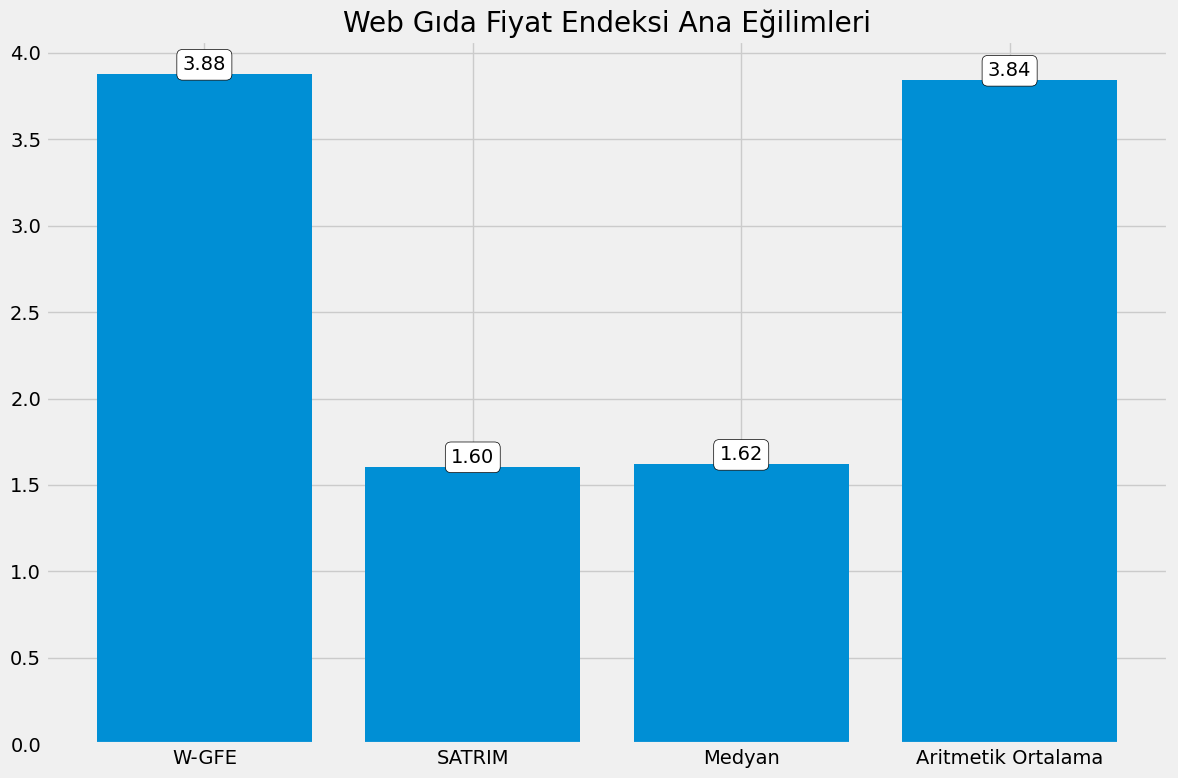

In [82]:
import matplotlib.pyplot as plt

# Grafiği çiz
plt.figure(figsize=(12, 8))
plt.title("Web Gıda Fiyat Endeksi Ana Eğilimleri")
plt.bar(x=egilim.columns, height=egilim.values[0])

# Değerleri kutu içinde sütunların hemen üstüne ekle
for i, value in enumerate(egilim.values[0]):
    plt.text(
        i, value, f'{value:.2f}', ha='center', va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")  # Kutuyu ayarlar
    )
plt.tight_layout()
plt.savefig("egilim_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()


In [ ]:
endeksler1=endeksler.T.iloc[:-1]
endeksler1=endeksler1.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler1))))
aylık=endeksler1.resample('M').mean()
ekim=endeksler1.resample('M').last()
aylık.loc["2024-10-31"]=ekim.loc["2024-10-31"]
aylık.loc[pd.to_datetime("2024-09-30")]=100
aylık=aylık.sort_index()
aylık=aylık.pct_change().dropna()*100

In [20]:
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler))))

In [56]:
aylık=endeksler.resample('M').mean()
ekim=endeksler.resample('M').last()

C:\Users\Bora\AppData\Local\Temp\ipykernel_10380\2428072938.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylık=endeksler.resample('M').mean()
C:\Users\Bora\AppData\Local\Temp\ipykernel_10380\2428072938.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ekim=endeksler.resample('M').last()


In [67]:
toplam=endeksler.iloc[-1]/endeksler.iloc[0]
aylık["Toplam"]=toplam

In [60]:
aylık=aylık.dropna().T

In [68]:
aylık

,2024-10-31 00:00:00,2024-11-30 00:00:00,Toplam
Ürün,,,
Pirinç,3.734033,-0.042846,1.036451
Buğday Unu,0.505967,0.000000,1.005060
Bebek Sütü (Toz Karışım),0.631592,-0.002659,1.006262
Bulgur,5.698307,-0.036426,1.056213
Ekmek,2.175406,0.762333,1.037332
...,...,...,...
Gazoz Meyveli,1.192031,0.000000,1.011920
Kola,2.751033,0.000000,1.027510
Soğuk Çay,0.682948,0.000000,1.006829


In [57]:
aylık.loc["2024-10-31"]=ekim.loc["2024-10-31"]

In [58]:
aylık.loc[pd.to_datetime("2024-09-30")]=100

In [59]:
aylık=aylık.sort_index()
aylık=aylık.pct_change()*100

In [9]:
import re

# Veriyi yükleyin
file_path = 'sepet.csv'  # Dosya yolunu buraya girin
data = pd.read_csv(file_path)

def is_multi_package(product_name):
    """
    Ürün adında çoklu paket ifadesi veya özel işaretli miktar olup olmadığını kontrol eder.
    Örneğin: '3X0,5 G', '4X1 G', '8x100 g', '4 x 1 L', '6*100 G' gibi ürünleri yakalar.
    """
    # Çoklu paket ifadelerini ve özel karakterli miktarları yakalayacak desen
    pattern = r'(\d+)\s?[xX×*]\s?(\d+[.,]?\d*)\s?(g|kg|ml|l|lt|adet|gr|G|KG|ML|L|LT|Adet|GR)?\b'
    product_name = product_name.strip()  # Fazladan boşlukları temizle
    return bool(re.search(pattern, product_name, re.IGNORECASE))

data = data[~data['Ürün'].apply(is_multi_package)]

# "Demet", "Adet" gibi ifadeleri kontrol et ve fiyatı aynen al
def is_piece_or_bunch(product_name):
    return bool(re.search(r'\b(demet|adet)\b', product_name, re.IGNORECASE))

# Miktarları düzeltme (virgül ve nokta işlemleri)
def correct_quantity_format(product_name):
    # Gram ve litre birimlerinde nokta olursa boşlukla değiştireceğiz,
    # ancak kilogram ve litre gibi birimler için nokta kalacak
    product_name = re.sub(r'(\d+)\.(\d+)\s?(G|g|L|l|Gr|gr)', r'\1\2 \3', product_name)  # 1.500G -> 1500 G, 1.500L -> 1500 L
    product_name = product_name.replace(',', '.')  # Virgülü noktaya çevir
    return product_name

# Yumurtalar için miktar çekme
def extract_egg_quantity(product_name):
    pattern = r"(\d+)[^\d]*(li|lü|lu|Lu|Lü|Li|lı|Lı)"  # "6'lı", "12'li" gibi ifadeler için desen
    match = re.search(pattern, product_name)
    if match:
        return int(match.group(1))  # Miktarı çıkar
    return None  # Eğer "li" ifadesi yoksa None döner

# "Adet" kelimesinden önceki sayıyı al
def extract_quantity_before_adet(product_name):
    match = re.search(r'(\d+)\s*(adet)', product_name, re.IGNORECASE)
    if match:
        return int(match.group(1))  # "adet" kelimesinden önceki sayıyı al
    return None  # Eğer "adet" kelimesi yoksa None döner

# Birim ve miktar bilgilerini çıkaran fonksiyon
def extract_quantity_unit(product_name):
    # Ürün adını düzelt
    product_name = correct_quantity_format(product_name)

    # Yumurtaları kontrol et: 6'Lı, adetli gibi ifadeler
    if 'yumurta' in product_name.lower():
        quantity = extract_egg_quantity(product_name)
        if quantity:  # Eğer miktar bulunmuşsa
            return quantity, 'adet'  # Yumurta ürünlerinde miktar her zaman adet
        else:
            # Eğer "yumurta" varsa ama miktar "li" ile tespit edilemiyorsa, "adet" kelimesinin öncesindeki sayıyı al
            quantity = extract_quantity_before_adet(product_name)
            if quantity:
                return quantity, 'adet'
            return 1, 'adet'  # Eğer yine de bulunamazsa 1 adet olarak kabul et

    # Aralık belirtilmiş ürünleri kontrol et (ör. 1200/1300 Kg)
    if re.search(r'\d+/\d+\s?Kg', product_name, re.IGNORECASE):
        return None, 'kg'  # 1 Kg fiyatı olarak işlenecek
    
    # Eğer adet bilgisi bulunamadıysa "adet" kelimesiyle arama yap
    if 'adet' in product_name.lower():
        return 1, 'adet'  # Eğer "adet" kelimesi varsa, miktar 1 olarak kabul edilir

    # Standart miktar ve birim çıkarımı
    match = re.search(r'(\d+(\.\d+)?)(\s?(Gr|Kg|L|ml|g|lt))', product_name, re.IGNORECASE)
    if match:
        quantity = float(match.group(1))  # Miktar
        unit = match.group(4).lower()    # Birim
        return quantity, unit
    
    # Eğer sadece birim varsa
    unit_match = re.search(r'\b(Kg|L|Gr|ml|lt)\b', product_name, re.IGNORECASE)
    if unit_match:
        return None, unit_match.group(1).lower()
    
    return None, None

# Yumurtaların adet fiyatını hesaplamak için fonksiyon
def calculate_egg_price(row, date):
    product_name = row['Ürün']
    
    # Yumurta ürünlerini kontrol et
    if 'yumurta' in product_name.lower():
        quantity, unit = extract_quantity_unit(product_name)
        if quantity:  # Eğer miktar bulunmuşsa
            return row[date] / quantity  # Yumurta ürünleri için fiyatı adete böl
    return row[date]  # Diğer ürünler için fiyatı değiştirme

# Çoklu paket ürünlerinin birim fiyatını NaN yap
data.loc[data['Ürün'].apply(is_multi_package), 'Birim Fiyat'] = None

# Adet veya demet gibi ifadeler olan ürünlerin birim fiyatını fiyatla aynı yap
data.loc[data['Ürün'].apply(is_piece_or_bunch), 'Birim Fiyat'] = None  # Adet/demet için fiyatı değiştirmedik

# Ürün adından miktar ve birim bilgilerini çıkar
data['Miktar'], data['Birim'] = zip(*data['Ürün'].apply(extract_quantity_unit))

# Birim dönüşümleri ve birim fiyat hesaplama fonksiyonu
def calculate_unit_price(row, price_column, date):
    # Birim dönüşümleri
    if row['Birim'] in ['ml', 'g', 'G', 'Gr', 'gr', 'Ml'] and pd.notna(row['Miktar']):
        # Mililitreyi litreye, gramı kilograma çevir
        adjusted_quantity = row['Miktar'] / 1000
    else:
        adjusted_quantity = row['Miktar']  # Diğer birimler için olduğu gibi al

    # Birim fiyat hesaplama
    if pd.isna(adjusted_quantity) and row['Birim'] in ['kg', 'l', 'Kg', 'L']:  # Miktar yok ama birim var
        return row[date]  # Zaten birim fiyatı
    elif pd.notna(adjusted_quantity):  # Miktar belirtilmişse birim fiyatı hesapla
        return row[date] / adjusted_quantity
    return None  # Diğer durumları atla

# Tüm tarih sütunları üzerinden her birim fiyatı hesaplayın
date_columns = [col for col in data.columns if re.match(r'\d{4}-\d{2}-\d{2}', col)]  # Tarih sütunlarını seçin

# Her bir tarih için birim fiyat hesaplayın
for date in date_columns:
    data[date + ' Birim Fiyat'] = data.apply(lambda row: calculate_egg_price(row, date), axis=1)  # Yumurtalar için adet fiyatı ekle
    data[date + ' Birim Fiyat'] = data.apply(lambda row: calculate_unit_price(row, date + ' Birim Fiyat', date), axis=1)  # Diğer ürünler için birim fiyatları hesapla

    # Birim fiyat NaN ise, tarih verisini birim fiyat olarak kullan
    data[date + ' Birim Fiyat'] = data[date + ' Birim Fiyat'].fillna(data[date])

# Sonuçları filtrele ve önemli sütunları göster
filtered_result = data.dropna(subset=[col for col in data.columns if 'Birim Fiyat' in col])[['Ürün', 'Miktar', 'Birim'] + [col for col in data.columns if 'Birim Fiyat' in col]]


birimler=[col for col in data.columns if 'Birim Fiyat' in col][1:]
birim=data.set_index("original_index")[birimler].groupby(level=0).mean()
birim=birim.T.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(birim.T)))
birim.to_csv("birim.csv")

In [97]:
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
while True:

    from datetime import datetime,timedelta
    bugün=datetime.now().strftime("%Y-%m-%d")
    dün=datetime.now()-timedelta(days=1)
    dün=dün.strftime("%Y-%m-%d")
    data=pd.read_csv("C:/Users/Makdos/Documents/GitHub/streamlit-gfe/sepet.csv")
    try:
        data=data.set_index(data["Unnamed: 0"]).drop("Unnamed: 0",axis=1)
    except:
        data=data.set_index(data["original_index"]).drop("original_index",axis=1)
    data.index.name=""
    def convert_to_float_and_drop_non_numeric(df):
        numeric_columns = df.columns[1:]  # Exclude the 'Ürün' column
        # Attempt to convert all numeric columns to float
        for col in numeric_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Drop rows where all numeric columns have NaN (i.e., non-convertible rows)
        df_cleaned = df.dropna(subset=numeric_columns, how='all')
        return df_cleaned

    # Apply the conversion and cleaning process
    df_cleaned = convert_to_float_and_drop_non_numeric(data.copy())

    # Function to fill NaN values from both right to left and left to right
    def fill_nan_both_directions(row):

        filled_row = row[::-1].fillna(method='ffill')[::-1]

        filled_row = filled_row.fillna(method='ffill')
        return filled_row

    def fill_nan_both_directions_corrected(df):
        numeric_columns = df.columns[1:]  # Exclude the 'Ürün' column
        df[numeric_columns] = df[numeric_columns].apply(fill_nan_both_directions, axis=1)
        return df


    df_filled_corrected = fill_nan_both_directions_corrected(df_cleaned)



    df_filled_corrected['original_index'] = df_filled_corrected.index  
    df_filled_corrected['normalized_product'] = df_filled_corrected['Ürün'].apply(lambda x: ' '.join(sorted(x.lower().split())))

    grouped_df_with_index = df_filled_corrected.groupby('normalized_product').agg(
        {col: lambda x: np.exp(np.log(x).mean()) for col in df_filled_corrected.columns if col not in ['Ürün', 'normalized_product', 'original_index']}
    ).reset_index()

    # Orijinal indexi her grubun ilk elemanından alma
    grouped_df_with_index['original_index'] = grouped_df_with_index['normalized_product'].apply(
        lambda x: df_filled_corrected.loc[df_filled_corrected['normalized_product'] == x, 'original_index'].min()
    )

    # Ürün kolonunu ilk ürün ismiyle doldurma
    grouped_df_with_index['Ürün'] = grouped_df_with_index['normalized_product'].apply(
        lambda x: df_filled_corrected.loc[df_filled_corrected['normalized_product'] == x, 'Ürün'].iloc[0]
    )

    # Index'i ayarlama
    grouped_df_with_index=grouped_df_with_index.set_index('original_index')

    # Sütun düzenleme
    grouped_df_with_index = grouped_df_with_index[['Ürün'] + [col for col in grouped_df_with_index.columns if col not in ['normalized_product', 'Ürün']]]



    ağırlıklar=pd.read_csv("C:/Users/Makdos/Documents/GitHub/streamlit-gfe/ağırlıklar.csv")
    ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
    ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
    ağırlıklar=ağırlıklar.sort_index()



    gfe=pd.read_csv("C:/Users/Makdos/Documents/GitHub/streamlit-gfe/gfe.csv")
    gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
    gfe=gfe.drop("Tarih",axis=1)



    data1=grouped_df_with_index.copy()
    degisim=(((data1.iloc[:,-1]/data1.iloc[:,1])-1)*100).fillna(0).groupby(level=0).mean().sort_index()



    ağırlıklar["Değişim"]=degisim



    ağırlıklar[f"Endeks_{bugün}"]=ağırlıklar[f"Endeks_2024-10-11"]*(1+(ağırlıklar["Değişim"]/100))

    ağırlıklar[f"Ağırlıklı Endeks_{bugün}"]=ağırlıklar[f"Endeks_{bugün}"]*ağırlıklar["Ağırlık"]
    gfe.loc[pd.to_datetime(bugün)]=ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
    tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
    print(f"GFE:{gfe.iloc[-1,0]} Tarih:{tarih}")


GFE:103.86949427283423 Tarih:2024-11-29 23:25
GFE:103.86949427283423 Tarih:2024-11-29 23:27
GFE:103.86949427283423 Tarih:2024-11-29 23:29


KeyboardInterrupt: 